In [1]:
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns
import numpy as np
# importing required libraries for normalizing data
from sklearn.preprocessing import StandardScaler,LabelBinarizer,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# representation of model layers
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import joblib
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB

2025-04-27 15:48:35.677067: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745768915.978839     116 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745768916.061798     116 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **ĐỌC DỮ LIỆU 34 NHÃN**

📌 Nhãn Mirai-greeth_flood: Thêm 5,042 dòng, tổng cộng 5,042 dòng
📌 Nhãn DDoS-TCP_Flood: Thêm 23,044 dòng, tổng cộng 23,044 dòng
📌 Nhãn DDoS-RSTFINFlood: Thêm 20,625 dòng, tổng cộng 20,625 dòng
📌 Nhãn DDoS-UDP_Flood: Thêm 27,807 dòng, tổng cộng 27,807 dòng
📌 Nhãn DDoS-ICMP_Flood: Thêm 37,281 dòng, tổng cộng 37,281 dòng
📌 Nhãn DDoS-ACK_Fragmentation: Thêm 1,468 dòng, tổng cộng 1,468 dòng
📌 Nhãn DDoS-SynonymousIP_Flood: Thêm 18,637 dòng, tổng cộng 18,637 dòng
📌 Nhãn DDoS-PSHACK_Flood: Thêm 21,226 dòng, tổng cộng 21,226 dòng
📌 Nhãn Mirai-udpplain: Thêm 4,643 dòng, tổng cộng 4,643 dòng
📌 Nhãn DDoS-SYN_Flood: Thêm 20,806 dòng, tổng cộng 20,806 dòng
📌 Nhãn MITM-ArpSpoofing: Thêm 1,603 dòng, tổng cộng 1,603 dòng
📌 Nhãn BenignTraffic: Thêm 5,645 dòng, tổng cộng 5,645 dòng
📌 Nhãn Mirai-greip_flood: Thêm 3,666 dòng, tổng cộng 3,666 dòng
📌 Nhãn DoS-UDP_Flood: Thêm 16,779 dòng, tổng cộng 16,779 dòng
📌 Nhãn DNS_Spoofing: Thêm 969 dòng, tổng cộng 969 dòng
📌 Nhãn DoS-TCP_Flood: Thêm 13,715 dòng, tổng 

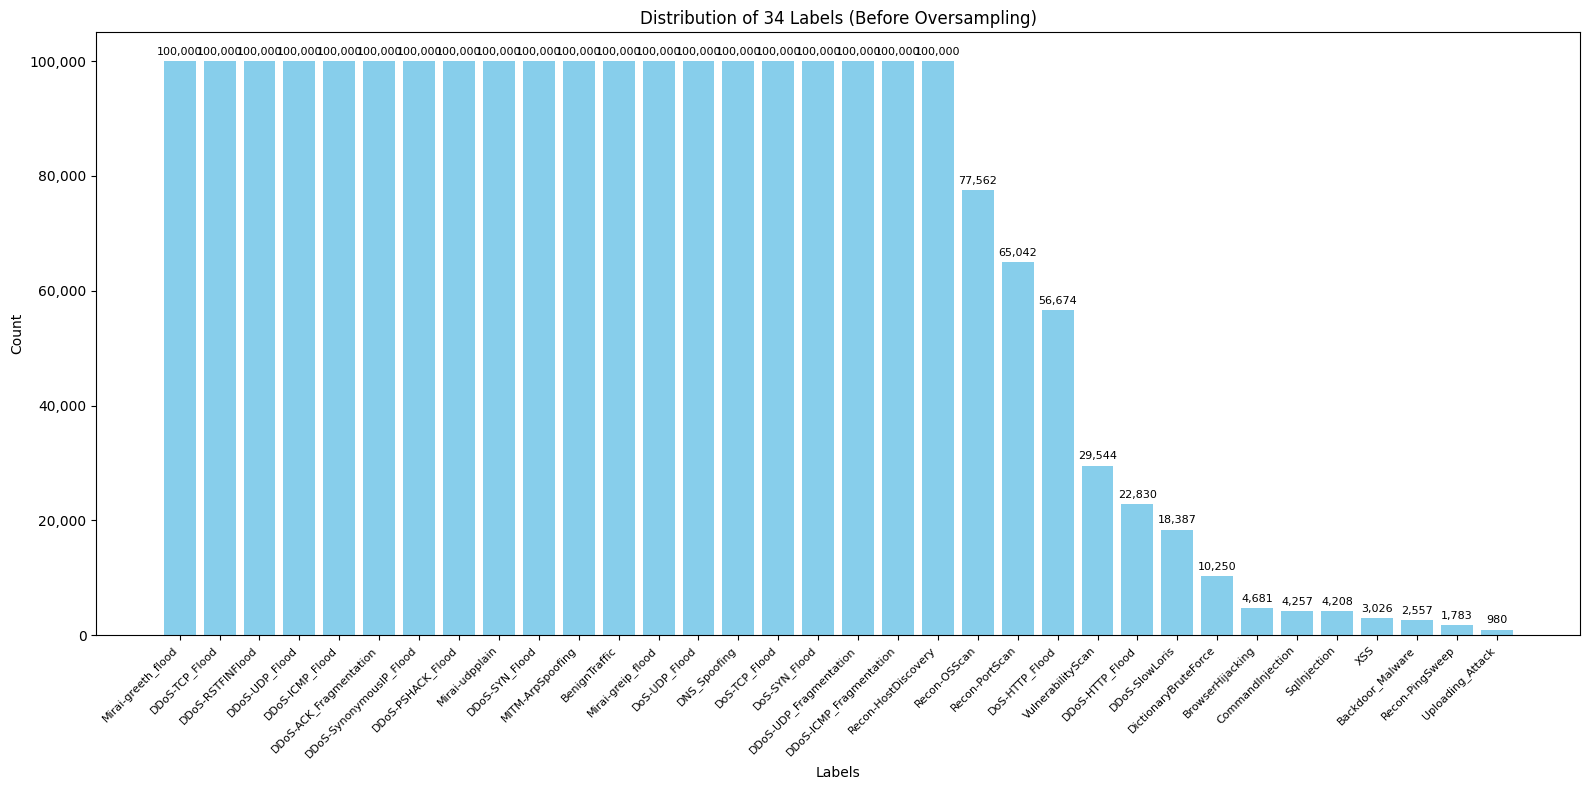

📌 Nhãn Mirai-greeth_flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-TCP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-RSTFINFlood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-UDP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-ICMP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-ACK_Fragmentation: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-SynonymousIP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-PSHACK_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn Mirai-udpplain: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-SYN_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn MITM-ArpSpoofing: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn BenignTraffic: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn Mirai-greip_flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DoS-UDP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DNS_Spoofing: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DoS-TCP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DoS-SYN_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-UDP_Fragmentation: Đã có 100,000 dòng, giữ n

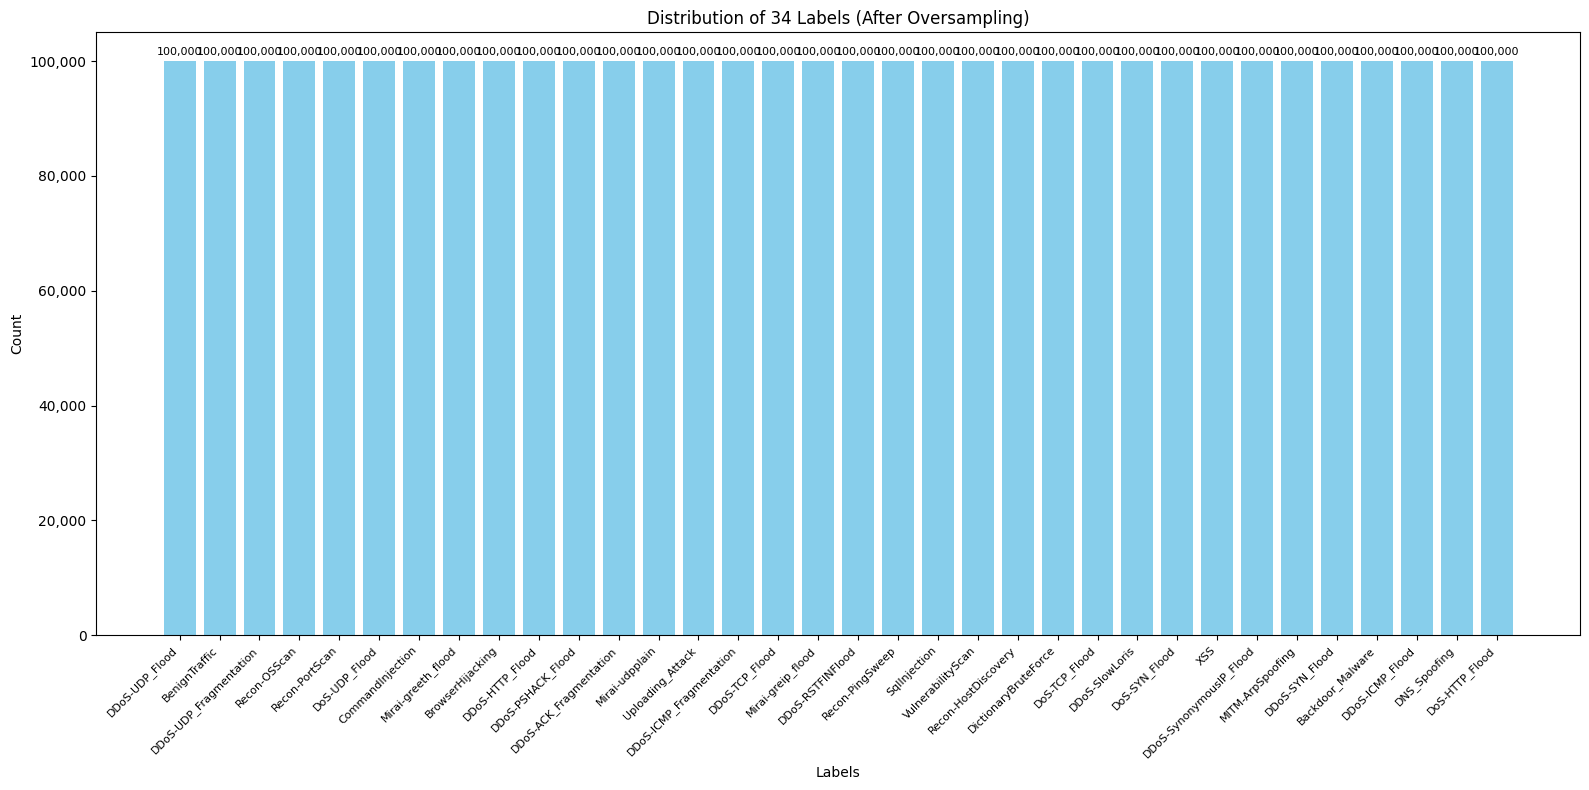

In [2]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import cudf  # Dùng cuDF để xử lý dữ liệu nhanh hơn trên GPU
import numpy as np
from sklearn.utils import resample

# Định nghĩa thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Danh sách 34 nhãn gốc từ CICIoT2023
labels = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Khởi tạo dictionary để theo dõi số dòng của từng nhãn
label_counts = {label: 0 for label in labels}

# Giới hạn tối đa và tối thiểu 200,000 dòng cho mỗi nhãn
MAX_ROWS_PER_LABEL = 100_000
MIN_ROWS_PER_LABEL = 100_000

# Hàm đọc file và lọc dữ liệu
def read_file(filename, index):
    try:
        # Đọc file CSV bằng cuDF
        df = cudf.read_csv(filename)
        
        # Kiểm tra cột 'label'
        if 'label' not in df.columns:
            print(f"❌ File {filename}: Không tìm thấy cột 'label'!")
            return None
        
        # Lọc dữ liệu dựa trên giới hạn 200K cho mỗi nhãn
        valid_rows = []
        unique_labels = df['label'].unique().to_pandas().tolist()
        for label in unique_labels:
            if label not in labels:
                continue  # Bỏ qua nhãn không thuộc danh sách 34 nhãn
            
            current_count = label_counts.get(label, 0)
            remaining_quota = MAX_ROWS_PER_LABEL - current_count
            
            if remaining_quota <= 0:
                print(f"⚠ Nhãn {label} đã đủ {MAX_ROWS_PER_LABEL:,} dòng, không đọc thêm!")
                continue
            
            # Lấy các dòng thuộc nhãn này
            label_df = df[df['label'] == label]
            rows_to_take = min(len(label_df), remaining_quota)
            
            if rows_to_take > 0:
                valid_rows.append(label_df[:rows_to_take])
                label_counts[label] = current_count + rows_to_take
                print(f"📌 Nhãn {label}: Thêm {rows_to_take:,} dòng, tổng cộng {label_counts[label]:,} dòng")
        
        # Gộp các dòng hợp lệ
        if valid_rows:
            df_filtered = cudf.concat(valid_rows, ignore_index=True)
            print(f"📌 File {index}: Giữ {df_filtered.shape[0]:,} dòng sau khi lọc giới hạn")
            return df_filtered
        else:
            print(f"⚠ File {index}: Không có dữ liệu nào được giữ lại!")
            return None
    except Exception as e:
        print(f"❌ Lỗi khi đọc file {filename}: {e}")
        return None

# Đọc dữ liệu từ thư mục
data_dir = "/kaggle/input/cic-iot-2023/"
file_list = glob.glob(f"{data_dir}*.csv")[:134]  # Lấy tối đa 134 file

# Đọc tuần tự từng file
dfs = []
for idx, fname in enumerate(file_list):
    df = read_file(fname, idx)
    if df is not None:
        dfs.append(df)

# Nối dữ liệu và xử lý cân bằng
if dfs:
    df_full = cudf.concat(dfs, ignore_index=True)
    print(f"✅ Dữ liệu đã được nối! Kích thước: {df_full.shape}")
    print(f"📋 Nhãn duy nhất: {df_full['label'].unique().to_pandas().tolist()}")
    
    # Chuyển sang pandas để xử lý oversampling
    df_pandas = df_full.to_pandas()
    
    # Kiểm tra phân bố nhãn trước khi cân bằng
    print("\n📋 Phân bố nhãn trước khi cân bằng:")
    label_distribution = df_pandas["label"].value_counts()
    print(label_distribution)
    
    # Vẽ biểu đồ phân bố nhãn trước khi cân bằng
    fig, ax = plt.subplots(figsize=(16, 8))
    bars = ax.bar(label_distribution.index, label_distribution.values, color='skyblue')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.set_xlabel('Labels')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of 34 Labels (Before Oversampling)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/label_distribution_before_oversampling_34labels.png')
    plt.show()
    
    # Chuẩn bị dữ liệu cho oversampling
    balanced_dfs = []
    unique_labels = df_pandas['label'].unique()
    
    # Áp dụng oversampling thủ công cho mỗi nhãn
    for label in unique_labels:
        if label not in labels:
            continue
        label_df = df_pandas[df_pandas['label'] == label]
        current_count = len(label_df)
        
        if current_count < MIN_ROWS_PER_LABEL:
            # Oversampling bằng resample
            oversampled_df = resample(
                label_df,
                replace=True,  # Cho phép sao chép mẫu
                n_samples=MIN_ROWS_PER_LABEL,  # Đạt 200K
                random_state=42
            )
            print(f"📌 Oversampling nhãn {label}: Từ {current_count:,} lên {MIN_ROWS_PER_LABEL:,} dòng")
            balanced_dfs.append(oversampled_df)
        else:
            print(f"📌 Nhãn {label}: Đã có {current_count:,} dòng, giữ nguyên")
            balanced_dfs.append(label_df)
    
    # Gộp dữ liệu đã cân bằng
    df_balanced = pd.concat(balanced_dfs, ignore_index=True)
    
    # Chuyển lại thành cuDF để đồng bộ
    df_full = cudf.from_pandas(df_balanced)
    
    # Kiểm tra phân bố nhãn sau khi cân bằng
    print("\n📋 Phân bố nhãn sau khi cân bằng bằng oversampling:")
    balanced_label_distribution = df_full["label"].value_counts().to_pandas()
    print(balanced_label_distribution)
    
    # Vẽ biểu đồ phân bố nhãn sau khi cân bằng
    fig, ax = plt.subplots(figsize=(16, 8))
    bars = ax.bar(balanced_label_distribution.index, balanced_label_distribution.values, color='skyblue')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.set_xlabel('Labels')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of 34 Labels (After Oversampling)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/label_distribution_after_oversampling_34labels.png')
    plt.show()
    
   
    
else:
    print("⚠ Không có file nào được đọc thành công hoặc tất cả dữ liệu rỗng!")

# **ÁNH XẠ NHÃN**

📋 Nhãn duy nhất trong dữ liệu: ['Mirai-greeth_flood', 'DDoS-TCP_Flood', 'DDoS-RSTFINFlood', 'DDoS-UDP_Flood', 'DDoS-ICMP_Flood', 'DDoS-ACK_Fragmentation', 'DDoS-SynonymousIP_Flood', 'DDoS-PSHACK_Flood', 'Mirai-udpplain', 'DDoS-SYN_Flood', 'MITM-ArpSpoofing', 'BenignTraffic', 'Mirai-greip_flood', 'DoS-UDP_Flood', 'DNS_Spoofing', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DDoS-UDP_Fragmentation', 'DDoS-ICMP_Fragmentation', 'Recon-OSScan', 'Recon-HostDiscovery', 'Recon-PortScan', 'DoS-HTTP_Flood', 'VulnerabilityScan', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris', 'DictionaryBruteForce', 'CommandInjection', 'SqlInjection', 'BrowserHijacking', 'Backdoor_Malware', 'Recon-PingSweep', 'XSS', 'Uploading_Attack']
📊 Ánh xạ nhãn (34 nhãn): {'Backdoor_Malware': 0, 'BenignTraffic': 1, 'BrowserHijacking': 2, 'CommandInjection': 3, 'DDoS-ACK_Fragmentation': 4, 'DDoS-HTTP_Flood': 5, 'DDoS-ICMP_Flood': 6, 'DDoS-ICMP_Fragmentation': 7, 'DDoS-PSHACK_Flood': 8, 'DDoS-RSTFINFlood': 9, 'DDoS-SYN_Flood': 10, 'DDoS-SlowLoris':

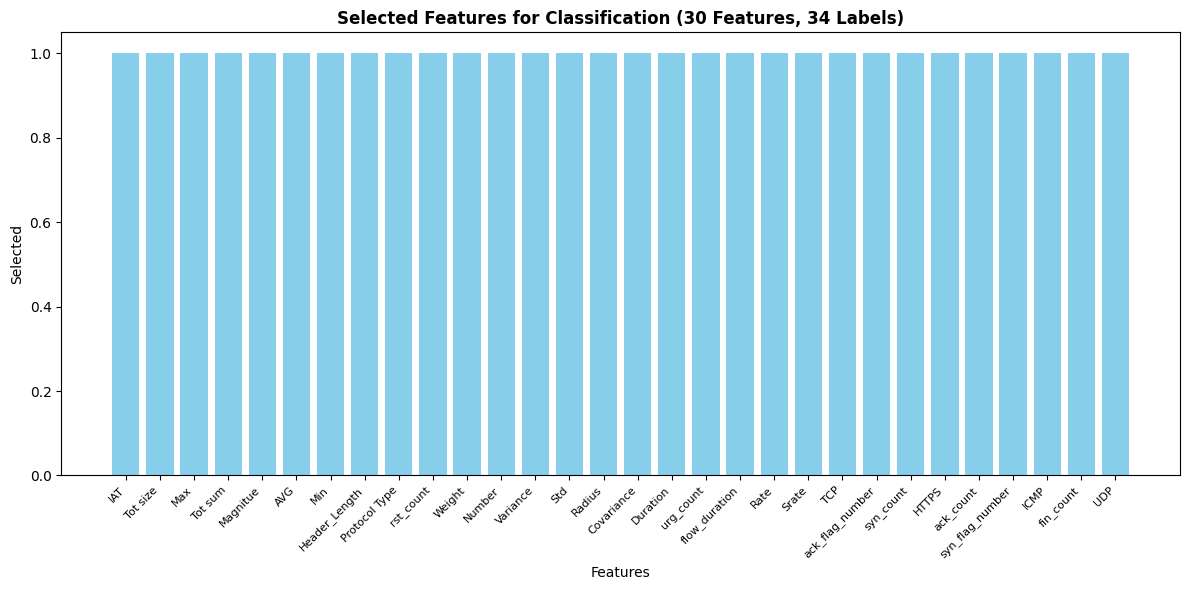

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.impute import KNNImputer
import pickle
import os
import matplotlib.pyplot as plt

# Đường dẫn lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Giả định df_full là DataFrame từ cell đọc dữ liệu trước đó (cuDF)
# Chuyển từ cuDF sang Pandas
df_original = df_full.to_pandas()

# Kiểm tra dữ liệu đầu vào
if df_original.empty or 'label' not in df_original.columns:
    raise ValueError("❌ Dữ liệu đầu vào rỗng hoặc thiếu cột 'label'!")

# Xử lý giá trị thiếu cho cột số
numeric_columns = df_original.select_dtypes(include=[np.number]).columns
df_original[numeric_columns] = df_original[numeric_columns].fillna(df_original[numeric_columns].mean())

# Tách đặc trưng và nhãn
X = df_original.drop(columns=['label']).select_dtypes(include=[np.number])
y = df_original['label']

# Kiểm tra nhãn duy nhất
print("📋 Nhãn duy nhất trong dữ liệu:", y.unique().tolist())

# Danh sách 30 đặc trưng đã chọn
selected_features = [
    'IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 
    'Protocol Type', 'rst_count', 'Weight', 'Number', 'Variance', 'Std', 'Radius', 
    'Covariance', 'Duration', 'urg_count', 'flow_duration', 'Rate', 'Srate', 'TCP', 
    'ack_flag_number', 'syn_count', 'HTTPS', 'ack_count', 'syn_flag_number', 'ICMP', 
    'fin_count', 'UDP'
]

# Kiểm tra xem các đặc trưng có tồn tại trong dữ liệu không
missing_features = [f for f in selected_features if f not in X.columns]
if missing_features:
    raise ValueError(f"❌ Các đặc trưng sau không tồn tại trong dữ liệu: {missing_features}")

# Lấy chỉ số của các đặc trưng đã chọn
feature_indices = [list(X.columns).index(f) for f in selected_features]

# Áp dụng các đặc trưng đã chọn trước khi chia dữ liệu
X = X[selected_features]

# Chia dữ liệu thành tập train, val, test
X_temp, X_test, Y_temp, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.1875, stratify=Y_temp, random_state=42)

# Mã hóa nhãn (34 nhãn gốc)
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_val_encoded = label_encoder.transform(Y_val)
Y_test_encoded = label_encoder.transform(Y_test)
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("📊 Ánh xạ nhãn (34 nhãn):", label_mapping)

# Kiểm tra phân bố nhãn
print("\n📊 Phân bố nhãn trong tập huấn luyện:")
print(pd.Series(Y_train_encoded).value_counts().rename(label_mapping))
print("\n📊 Phân bố nhãn trong tập validation:")
print(pd.Series(Y_val_encoded).value_counts().rename(label_mapping))
print("\n📊 Phân bố nhãn trong tập kiểm tra:")
print(pd.Series(Y_test_encoded).value_counts().rename(label_mapping))

# Xử lý NaN và outlier bằng KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

# Chuẩn hóa dữ liệu bằng RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Kiểm tra giá trị sau khi chọn đặc trưng
print("🔍 Giá trị tối đa và tối thiểu trong X_train_scaled:")
print(pd.DataFrame(X_train_scaled, columns=selected_features).describe().loc[['min', 'max']])
print("🔍 Giá trị tối đa và tối thiểu trong X_val_scaled:")
print(pd.DataFrame(X_val_scaled, columns=selected_features).describe().loc[['min', 'max']])
print("🔍 Giá trị tối đa và tối thiểu trong X_test_scaled:")
print(pd.DataFrame(X_test_scaled, columns=selected_features).describe().loc[['min', 'max']])

# Lưu dữ liệu đã xử lý
np.save(f"{output_dir}/X_train_scaled_34labels.npy", X_train_scaled)
np.save(f"{output_dir}/Y_train_encoded_34labels.npy", Y_train_encoded)
np.save(f"{output_dir}/X_val_scaled_34labels.npy", X_val_scaled)
np.save(f"{output_dir}/Y_val_encoded_34labels.npy", Y_val_encoded)
np.save(f"{output_dir}/X_test_scaled_34labels.npy", X_test_scaled)
np.save(f"{output_dir}/Y_test_encoded_34labels.npy", Y_test_encoded)

# Lưu các đối tượng xử lý
with open(f"{output_dir}/label_encoder_34labels.pkl", 'wb') as f:
    pickle.dump(label_encoder, f)
with open(f"{output_dir}/scaler_34labels.pkl", 'wb') as f:
    pickle.dump(scaler, f)
with open(f"{output_dir}/imputer_34labels.pkl", 'wb') as f:
    pickle.dump(imputer, f)
with open(f"{output_dir}/selected_features_34labels.pkl", 'wb') as f:
    pickle.dump(selected_features, f)

# In thông tin chi tiết
print(f"✅ Dữ liệu đã xử lý và lưu trong '{output_dir}'!")
print(f"📌 Số đặc trưng được chọn: {len(selected_features)}")
print(f"📋 Các đặc trưng được chọn: {selected_features}")

# Vẽ biểu đồ danh sách đặc trưng được chọn
plt.figure(figsize=(12, 6))
plt.bar(selected_features, [1] * len(selected_features), color='skyblue')
plt.title('Selected Features for Classification (30 Features, 34 Labels)', fontsize=12, fontweight='bold')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Selected', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.savefig(f"{output_dir}/selected_features_34labels.png")
plt.show()

# **CHUYỂN ĐỔI ĐẶC TRƯNG FUZZY**

📊 Ánh xạ nhãn (34 nhãn): {'Backdoor_Malware': 0, 'BenignTraffic': 1, 'BrowserHijacking': 2, 'CommandInjection': 3, 'DDoS-ACK_Fragmentation': 4, 'DDoS-HTTP_Flood': 5, 'DDoS-ICMP_Flood': 6, 'DDoS-ICMP_Fragmentation': 7, 'DDoS-PSHACK_Flood': 8, 'DDoS-RSTFINFlood': 9, 'DDoS-SYN_Flood': 10, 'DDoS-SlowLoris': 11, 'DDoS-SynonymousIP_Flood': 12, 'DDoS-TCP_Flood': 13, 'DDoS-UDP_Flood': 14, 'DDoS-UDP_Fragmentation': 15, 'DNS_Spoofing': 16, 'DictionaryBruteForce': 17, 'DoS-HTTP_Flood': 18, 'DoS-SYN_Flood': 19, 'DoS-TCP_Flood': 20, 'DoS-UDP_Flood': 21, 'MITM-ArpSpoofing': 22, 'Mirai-greeth_flood': 23, 'Mirai-greip_flood': 24, 'Mirai-udpplain': 25, 'Recon-HostDiscovery': 26, 'Recon-OSScan': 27, 'Recon-PingSweep': 28, 'Recon-PortScan': 29, 'SqlInjection': 30, 'Uploading_Attack': 31, 'VulnerabilityScan': 32, 'XSS': 33}

📊 Phân bố nhãn trong tập huấn luyện:
32    65000
22    65000
23    65000
14    65000
10    65000
24    65000
0     65000
33    65000
26    65000
15    65000
8     65000
28    65000
29

Processing fuzzy features:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:59:08] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
Processing fuzzy features: 100%|██████████| 10/10 [05:50<00:00, 35.03s/it]


✅ Input shape (sau khi áp dụng fuzzy XGB): train (2210000, 340), val (510000, 340), test (680000, 340)
⏱ Thời gian xử lý: 422.74s
X_train_fuzzy nan: False
X_train_fuzzy inf: False
X_val_fuzzy nan: False
X_val_fuzzy inf: False
X_test_fuzzy nan: False
X_test_fuzzy inf: False
✅ Dữ liệu fuzzy đã xử lý và lưu trong 'processed_data'!
📌 Số đặc trưng fuzzy: 340 (10 đặc trưng × 34 nhãn)
📋 10 đặc trưng quan trọng được chọn: ['ICMP', 'syn_flag_number', 'IAT', 'Weight', 'Magnitue', 'ack_count', 'Protocol Type', 'fin_count', 'Max', 'urg_count']


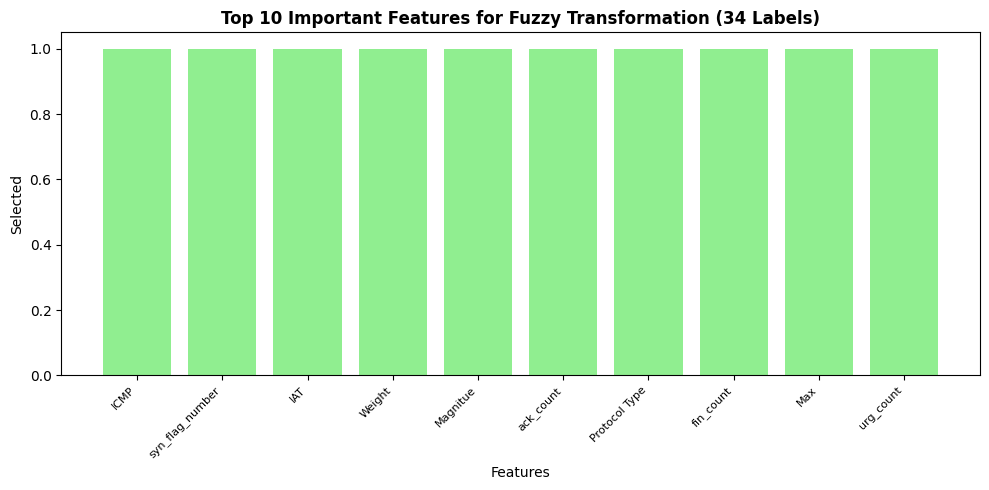

In [4]:
import pandas as pd
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from tqdm import tqdm
import pickle
import os
import matplotlib.pyplot as plt
import joblib

# Đường dẫn lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Giả định df_full là DataFrame từ cell đọc dữ liệu trước đó (cuDF)
# Chuyển từ cuDF sang Pandas
df_original = df_full.to_pandas()

# Kiểm tra dữ liệu đầu vào
if df_original.empty or 'label' not in df_original.columns:
    raise ValueError("❌ Dữ liệu đầu vào rỗng hoặc thiếu cột 'label'!")

# Xử lý giá trị thiếu cho cột số
numeric_columns = df_original.select_dtypes(include=[np.number]).columns
df_original[numeric_columns] = df_original[numeric_columns].fillna(df_original[numeric_columns].mean())

# Tách đặc trưng và nhãn
X = df_original.drop(columns=['label']).select_dtypes(include=[np.number])
y = df_original['label']

# Danh sách 30 đặc trưng đã chọn
selected_features = [
    'IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 
    'Protocol Type', 'rst_count', 'Weight', 'Number', 'Variance', 'Std', 'Radius', 
    'Covariance', 'Duration', 'urg_count', 'flow_duration', 'Rate', 'Srate', 'TCP', 
    'ack_flag_number', 'syn_count', 'HTTPS', 'ack_count', 'syn_flag_number', 'ICMP', 
    'fin_count', 'UDP'
]

# Kiểm tra xem các đặc trưng có tồn tại trong dữ liệu không
missing_features = [f for f in selected_features if f not in X.columns]
if missing_features:
    raise ValueError(f"❌ Các đặc trưng sau không tồn tại trong dữ liệu: {missing_features}")

# Lấy chỉ số của các đặc trưng đã chọn
feature_indices = [list(X.columns).index(f) for f in selected_features]

# Áp dụng các đặc trưng đã chọn trước khi chia dữ liệu
X = X[selected_features]

# Chia dữ liệu thành tập train, val, test
X_temp, X_test, Y_temp, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.1875, stratify=Y_temp, random_state=42)

# Mã hóa nhãn (34 nhãn gốc)
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_val_encoded = label_encoder.transform(Y_val)
Y_test_encoded = label_encoder.transform(Y_test)
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("📊 Ánh xạ nhãn (34 nhãn):", label_mapping)

# Kiểm tra phân bố nhãn
print("\n📊 Phân bố nhãn trong tập huấn luyện:")
print(pd.Series(Y_train_encoded).value_counts().rename(label_mapping))
print("\n📊 Phân bố nhãn trong tập validation:")
print(pd.Series(Y_val_encoded).value_counts().rename(label_mapping))
print("\n📊 Phân bố nhãn trong tập kiểm tra:")
print(pd.Series(Y_test_encoded).value_counts().rename(label_mapping))

# Xử lý NaN và outlier bằng KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

# Chuẩn hóa dữ liệu bằng RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Chọn 10 đặc trưng quan trọng nhất bằng XGBoost
def select_important_features(X_train, Y_train, feature_names, n_features_to_select=10):
    xgb = XGBClassifier(
        n_estimators=50,
        max_depth=10,
        min_child_weight=10,
        tree_method="hist",
        device="cuda",
        random_state=44,
        objective="multi:softprob"
    )
    xgb.fit(X_train, Y_train)
    importance = xgb.feature_importances_
    feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance})
    feature_importance = feature_importance.sort_values(by='importance', ascending=False)
    selected_features = feature_importance['feature'].head(n_features_to_select).tolist()
    selected_indices = [list(feature_names).index(f) for f in selected_features]
    print(f"✅ Đã chọn 10 đặc trưng quan trọng: {selected_features}")
    return selected_indices, selected_features

# Hàm tính đặc trưng fuzzy bằng XGBoost với GPU
def convert_to_fuzzy_features_xgb(X_train, Y_train, X_val, X_test, selected_features, selected_indices, n_labels=34, n_estimators=50):
    X_train_fuzzy = []
    X_val_fuzzy = []
    X_test_fuzzy = []
    
    # Lặp qua các đặc trưng được chọn
    for idx, i in enumerate(tqdm(selected_indices, desc="Processing fuzzy features")):
        # Lấy đặc trưng i từ tập train, val, test
        X_train_feature = X_train[:, i].reshape(-1, 1)
        X_val_feature = X_val[:, i].reshape(-1, 1)
        X_test_feature = X_test[:, i].reshape(-1, 1)
        
        # Huấn luyện XGBoost cho đặc trưng i
        xgb = XGBClassifier(
            n_estimators=n_estimators,
            max_depth=10,
            min_child_weight=10,
            tree_method="hist",
            device="cuda",
            random_state=44,
            objective="multi:softprob"
        )
        xgb.fit(X_train_feature, Y_train)
        
        # Dự đoán xác suất cho mỗi nhãn
        train_probs = xgb.predict_proba(X_train_feature)  # [n_samples, n_labels]
        val_probs = xgb.predict_proba(X_val_feature)
        test_probs = xgb.predict_proba(X_test_feature)
        
        # Đảm bảo đủ 34 nhãn trong xác suất
        if train_probs.shape[1] < n_labels:
            missing_labels = n_labels - train_probs.shape[1]
            train_probs = np.pad(train_probs, ((0, 0), (0, missing_labels)), mode='constant')
            val_probs = np.pad(val_probs, ((0, 0), (0, missing_labels)), mode='constant')
            test_probs = np.pad(test_probs, ((0, 0), (0, missing_labels)), mode='constant')
        
        # Thêm xác suất vào danh sách đặc trưng fuzzy
        X_train_fuzzy.append(train_probs)
        X_val_fuzzy.append(val_probs)
        X_test_fuzzy.append(test_probs)
        
        # Lưu mô hình XGBoost cho đặc trưng
        joblib.dump(xgb, f"{output_dir}/xgb_feature_{selected_features[idx]}_34labels.joblib")
    
    # Chuyển thành ma trận [n_samples, n_selected_features * n_labels]
    X_train_fuzzy = np.concatenate(X_train_fuzzy, axis=1)  # [n_samples, 10*34]
    X_val_fuzzy = np.concatenate(X_val_fuzzy, axis=1)
    X_test_fuzzy = np.concatenate(X_test_fuzzy, axis=1)
    
    return X_train_fuzzy, X_val_fuzzy, X_test_fuzzy

# Chọn 10 đặc trưng quan trọng và biến đổi fuzzy
print("🔄 Chọn 10 đặc trưng quan trọng và tính đặc trưng fuzzy...")
start_time = time.time()
selected_indices, selected_features_top10 = select_important_features(X_train_scaled, Y_train_encoded, selected_features, n_features_to_select=10)
X_train_fuzzy, X_val_fuzzy, X_test_fuzzy = convert_to_fuzzy_features_xgb(
    X_train_scaled, Y_train_encoded, X_val_scaled, X_test_scaled,
    selected_features=selected_features_top10, selected_indices=selected_indices, n_labels=34
)

print(f"✅ Input shape (sau khi áp dụng fuzzy XGB): "
      f"train {X_train_fuzzy.shape}, val {X_val_fuzzy.shape}, test {X_test_fuzzy.shape}")
print(f"⏱ Thời gian xử lý: {time.time() - start_time:.2f}s")

# Kiểm tra giá trị NaN/Inf
print(f"X_train_fuzzy nan: {np.any(np.isnan(X_train_fuzzy))}")
print(f"X_train_fuzzy inf: {np.any(np.isinf(X_train_fuzzy))}")
print(f"X_val_fuzzy nan: {np.any(np.isnan(X_val_fuzzy))}")
print(f"X_val_fuzzy inf: {np.any(np.isinf(X_val_fuzzy))}")
print(f"X_test_fuzzy nan: {np.any(np.isnan(X_test_fuzzy))}")
print(f"X_test_fuzzy inf: {np.any(np.isinf(X_test_fuzzy))}")

# Xử lý NaN/Inf nếu có
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        print(f"⚠️ {name} contains NaN or Inf values, replacing...")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Lưu dữ liệu fuzzy
np.save(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy", X_train_fuzzy)
np.save(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy", X_val_fuzzy)
np.save(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy", X_test_fuzzy)
np.save(f"{output_dir}/Y_train_encoded_34labels.npy", Y_train_encoded)
np.save(f"{output_dir}/Y_val_encoded_34labels.npy", Y_val_encoded)
np.save(f"{output_dir}/Y_test_encoded_34labels.npy", Y_test_encoded)

# Lưu các đối tượng xử lý
with open(f"{output_dir}/label_encoder_34labels.pkl", 'wb') as f:
    pickle.dump(label_encoder, f)
with open(f"{output_dir}/scaler_34labels.pkl", 'wb') as f:
    pickle.dump(scaler, f)
with open(f"{output_dir}/imputer_34labels.pkl", 'wb') as f:
    pickle.dump(imputer, f)
with open(f"{output_dir}/selected_features_top10_34labels.pkl", 'wb') as f:
    pickle.dump(selected_features_top10, f)

# In thông tin chi tiết
print(f"✅ Dữ liệu fuzzy đã xử lý và lưu trong '{output_dir}'!")
print(f"📌 Số đặc trưng fuzzy: 340 (10 đặc trưng × 34 nhãn)")
print(f"📋 10 đặc trưng quan trọng được chọn: {selected_features_top10}")

# Vẽ biểu đồ danh sách 10 đặc trưng được chọn
plt.figure(figsize=(10, 5))
plt.bar(selected_features_top10, [1] * len(selected_features_top10), color='lightgreen')
plt.title('Top 10 Important Features for Fuzzy Transformation (34 Labels)', fontsize=12, fontweight='bold')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Selected', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.savefig(f"{output_dir}/selected_features_top10_34labels.png")
plt.show()

# **MÔ HÌNH DCN-V2 FUZZY ĐẶC TRƯNG**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# CrossLayer
class CrossLayer(nn.Module):
    def __init__(self, input_dim):
        super(CrossLayer, self).__init__()
        self.weight = nn.Parameter(torch.randn(input_dim, input_dim) * 0.01)
        self.bias = nn.Parameter(torch.zeros(input_dim))
        self.norm = nn.LayerNorm(input_dim)
        nn.init.xavier_normal_(self.weight, gain=0.1)
        nn.init.zeros_(self.bias)

    def forward(self, x_0, x_l):
        assert x_0.dim() == 2 and x_l.dim() == 2, f"Expected 2D tensors, got x_0: {x_0.shape}, x_l: {x_l.shape}"
        x_l_w = torch.matmul(x_l, self.weight)
        x_l_w_b = x_l_w + self.bias
        x_0_dot = x_0 * x_l_w_b
        x_l_plus_1 = x_0_dot + x_l
        x_l_plus_1 = self.norm(x_l_plus_1)
        return x_l_plus_1

# DCNV2
class DCNV2(nn.Module):
    def __init__(self, input_dim, num_classes, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=128):
        super(DCNV2, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.cross_layers = nn.ModuleList([CrossLayer(input_dim) for _ in range(n_cross_layers)])
        deep_layers = []
        prev_dim = input_dim
        for _ in range(n_deep_layers):
            deep_layers.extend([
                nn.Linear(prev_dim, deep_layer_dim),
                nn.BatchNorm1d(deep_layer_dim),
                nn.ReLU(),
                nn.Dropout(0.1)
            ])
            prev_dim = deep_layer_dim
        self.deep = nn.Sequential(*deep_layers)
        self.combine_fc = nn.Linear(input_dim + deep_layer_dim, num_classes)
        nn.init.xavier_normal_(self.combine_fc.weight, gain=0.1)
        nn.init.zeros_(self.combine_fc.bias)
        self.importance_layer = nn.Linear(input_dim, input_dim)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        x_0 = x
        x_cross = x
        for i, layer in enumerate(self.cross_layers):
            x_cross = layer(x_0, x_cross)
            if torch.isnan(x_cross).any():
                tqdm.write(f"NaN detected in CrossLayer {i+1}")
                break
        x_deep = self.deep(x)
        if torch.isnan(x_deep).any():
            tqdm.write("NaN detected in Deep layers")
        combined = torch.cat([x_cross, x_deep], dim=1)
        output = self.combine_fc(combined)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu fuzzy (10 đặc trưng fuzzy, 34 nhãn)
try:
    X_train_fuzzy = np.load(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy")  # Shape: (n_train, 340)
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_fuzzy = np.load(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy")      # Shape: (n_val, 340)
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_fuzzy = np.load(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy")    # Shape: (n_test, 340)
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write("✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf trong dữ liệu
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Chuẩn hóa dữ liệu
X_train_fuzzy = (X_train_fuzzy - X_train_fuzzy.mean(axis=0)) / (X_train_fuzzy.std(axis=0) + 1e-6)
X_val_fuzzy = (X_val_fuzzy - X_val_fuzzy.mean(axis=0)) / (X_val_fuzzy.std(axis=0) + 1e-6)
X_test_fuzzy = (X_test_fuzzy - X_test_fuzzy.mean(axis=0)) / (X_test_fuzzy.std(axis=0) + 1e-6)

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_fuzzy, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_fuzzy, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_fuzzy, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)

# DataLoader
batch_size = 2048  # Giảm batch_size để tiết kiệm VRAM
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded, minlength=34)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình và tối ưu hóa
input_dim = X_train_fuzzy.shape[1]  # 10*34 = 340
model = DCNV2(input_dim=input_dim, num_classes=34, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=128).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 100
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Danh sách 34 nhãn
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Huấn luyện với gradient accumulation
tqdm.write("Bắt đầu huấn luyện DCN-V2 với Focal + Sparsity Loss (Không Early Stopping)")
torch.manual_seed(44)
accumulation_steps = 2  # Tích lũy gradient qua 2 bước
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    optimizer.zero_grad()
    with tqdm(train_loader, desc=f"Huấn luyện Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for i, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"Phát hiện NaN trong total_loss tại batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss / accumulation_steps).backward()
            grad_norm = 0.0  # Khởi tạo mặc định
            if (i + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean()
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Xác thực (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình nếu F1 tốt hơn
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/dcnv2_34labels_fuzzy_top10.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/dcnv2_34labels_fuzzy_top10_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/dcnv2_34labels_fuzzy_top10_final.pth")

# Lưu dữ liệu đánh giá
np.save(f"{results_dir}/train_losses_34labels_fuzzy_top10_dcnv2.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_fuzzy_top10_dcnv2.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_fuzzy_top10_dcnv2.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_fuzzy_top10_dcnv2.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_fuzzy_top10_dcnv2.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_fuzzy_top10_dcnv2.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_fuzzy_top10_dcnv2.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_fuzzy_top10_dcnv2.npy", np.array(epoch_times))

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/dcnv2_34labels_fuzzy_top10.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Lưu dữ liệu cho biểu đồ
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_top10_dcnv2.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_fuzzy_top10_dcnv2.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_fuzzy_top10_dcnv2.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_fuzzy_top10_dcnv2.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_fuzzy_top10_dcnv2.npy", avg_mask)

# Tính giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)

# Lưu kết quả vào file
with open(f"{results_dir}/DCN-v2_34labels_fuzzy_top10.txt", 'w') as f:
    f.write("Kết quả huấn luyện DCN-V2 (34 nhãn, 10 đặc trưng fuzzy)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/DCN-v2_34labels_fuzzy_top10.txt")

# In thông tin shape
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn)
Bắt đầu huấn luyện DCN-V2 với Focal + Sparsity Loss (Không Early Stopping)


Huấn luyện Batch (Epoch 1/100):   0%|          | 1/1079 [00:00<03:47,  4.74batch/s, loss=0.0935]

Batch 1: Outputs max/min: 0.4792/-0.4807, Focal Loss: 0.0932, Sparsity Loss: 0.6918, Grad Norm: 0.0000, Mask sum: 170.1250


Huấn luyện Batch (Epoch 1/100):   1%|          | 6/1079 [00:00<01:26, 12.46batch/s, loss=0.0883]

Batch 2: Outputs max/min: 0.4697/-0.4644, Focal Loss: 0.0933, Sparsity Loss: 0.6918, Grad Norm: 0.0878, Mask sum: 170.1250
Batch 3: Outputs max/min: 0.5835/-0.4932, Focal Loss: 0.0919, Sparsity Loss: 0.6917, Grad Norm: 0.0000, Mask sum: 170.1250
Batch 3: Outputs max/min: 0.4729/-0.5186, Focal Loss: 0.0921, Sparsity Loss: 0.6917, Grad Norm: 0.0870, Mask sum: 170.1250
Batch 3: Outputs max/min: 0.5391/-0.4878, Focal Loss: 0.0905, Sparsity Loss: 0.6916, Grad Norm: 0.0000, Mask sum: 170.1250
Batch 3: Outputs max/min: 0.5127/-0.6011, Focal Loss: 0.0905, Sparsity Loss: 0.6916, Grad Norm: 0.0877, Mask sum: 170.1250


✅ Epoch 1/100: Train Loss: 0.0216, Val Loss: 0.0121, Train Acc: 80.14%, Val Acc: 85.42%, F1: 0.8550, Precision: 0.8591, Recall: 0.8542, Time: 41.65s
Phân bố dự đoán (Validation): [17597 20833 14448 15920 15023 15051 14976 14967 14995 14981 14972 15014
 14994 14970 14998 14995 13792 13295 15049 14942 15017 14982 13149 14985
 15001 14977 13040 12949 17451 11706 14802 18042 15100 12987]
Ma trận nhầm lẫn:
[[ 9697   653   345 ...   958     0   599]
 [  390 10721   632 ...   225     0   182]
 [  643  1139  9654 ...   604     0   463]
 ...
 [  598   218   349 ... 10585     0   798]
 [    0     0     1 ...     0 14892     0]
 [ 1246   433   502 ...  1398     0  8035]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2907), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2221), ('Mirai-udpplain', 'BenignTraffic', 2196), ('DDoS-ICMP_Flood', 'DDoS-PSHACK_Flood', 1991), ('DDoS-PSHACK_Flood', 'Mirai-udpplain', 1978)]
📦 Lưu mô hình tốt nhất tại epoch 1


✅ Epoch 2/100: Train Loss: 0.0119, Val Loss: 0.0115, Train Acc: 85.48%, Val Acc: 86.06%, F1: 0.8613, Precision: 0.8661, Recall: 0.8606, Time: 41.50s
Phân bố dự đoán (Validation): [16066 18322 14433 11771 15016 15048 14979 14975 14999 14990 15005 15031
 14979 14987 15010 14989 14565 14767 15015 14963 15028 14992 13760 15000
 14992 14988 12055 12038 19374 12466 13764 19633 15003 16997]
Ma trận nhầm lẫn:
[[ 9694   525   351 ...  1048     0  1106]
 [  326 10324   605 ...   247     0   322]
 [  508   987  9764 ...   624     0   667]
 ...
 [  346   163   337 ... 11679     0   960]
 [    0     0     1 ...     0 14926     0]
 [  907   315   445 ...  1455     0  9179]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2887), ('Mirai-udpplain', 'BenignTraffic', 2415), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2127), ('DDoS-ICMP_Flood', 'BenignTraffic', 2013), ('Recon-HostDiscovery', 'DNS_Spoofing', 1703)]
📦 Lưu mô hình tốt nhất tại epoch 2


✅ Epoch 3/100: Train Loss: 0.0115, Val Loss: 0.0111, Train Acc: 86.01%, Val Acc: 86.40%, F1: 0.8647, Precision: 0.8694, Recall: 0.8640, Time: 41.48s
Phân bố dự đoán (Validation): [15257 20975 14994 12538 15016 15041 14979 14969 14997 14992 14990 15026
 15006 14989 15013 14985 13186 15638 15013 14969 15025 14986 12377 15005
 14991 14988 13448 11015 16670 12669 17009 18653 15010 15581]
Ma trận nhầm lẫn:
[[ 9742   645   352 ...   846     0   934]
 [  266 10900   535 ...   220     0   262]
 [  390  1251  9983 ...   546     0   566]
 ...
 [  294   151   413 ... 12004     0   833]
 [    0     0     1 ...     0 14941     0]
 [  863   474   500 ...  1262     0  8947]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2748), ('Mirai-udpplain', 'BenignTraffic', 2095), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2001), ('DDoS-ICMP_Flood', 'BenignTraffic', 1797), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1786)]
📦 Lưu mô hình tốt nhất tại epoch 3


✅ Epoch 4/100: Train Loss: 0.0111, Val Loss: 0.0109, Train Acc: 86.42%, Val Acc: 86.83%, F1: 0.8685, Precision: 0.8720, Recall: 0.8683, Time: 41.50s
Phân bố dự đoán (Validation): [17182 16555 16490 16232 15012 15035 14979 14971 14997 14995 14974 15013
 15026 14989 15010 14990 13198 13476 15017 14970 15027 14988 13745 15009
 14989 14986 13280 10405 18152 12188 15078 17038 15015 16989]
Ma trận nhầm lẫn:
[[10323   346   404 ...   549     0   939]
 [  377 10073   868 ...   181     1   332]
 [  492   738 10390 ...   420     0   656]
 ...
 [  371    94   397 ... 12180     0   783]
 [    0     0     1 ...     0 14946     0]
 [  883   248   484 ...   898     0  9654]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2625), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2362), ('DDoS-ICMP_Flood', 'DDoS-PSHACK_Flood', 1897), ('DDoS-ICMP_Flood', 'BenignTraffic', 1822), ('Mirai-udpplain', 'BenignTraffic', 1681)]
📦 Lưu mô hình tốt nhất tại epoch 4


✅ Epoch 5/100: Train Loss: 0.0109, Val Loss: 0.0106, Train Acc: 86.77%, Val Acc: 87.19%, F1: 0.8719, Precision: 0.8763, Recall: 0.8719, Time: 41.57s
Phân bố dự đoán (Validation): [18747 17700 13587 14678 15005 15031 14980 14970 15000 14995 15021 15042
 14984 14990 15017 14988 13389 13879 15007 14973 15020 14983 12441 15005
 14991 14987 13022 10570 18553 12640 15949 19313 15004 15539]
Ma trận nhầm lẫn:
[[10801   324   233 ...   685     0   783]
 [  454 10391   474 ...   217     0   303]
 [  661  1042  9849 ...   517     0   550]
 ...
 [  450    17   115 ... 13381     0   349]
 [    0     0     1 ...     0 14948     0]
 [ 1085   278   312 ...  1047     0  9539]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2710), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2062), ('DDoS-ICMP_Flood', 'BenignTraffic', 1868), ('DDoS-ICMP_Flood', 'DDoS-PSHACK_Flood', 1793), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1516)]
📦 Lưu mô hình tốt nhất tại epoch 5


✅ Epoch 6/100: Train Loss: 0.0107, Val Loss: 0.0105, Train Acc: 87.04%, Val Acc: 87.34%, F1: 0.8736, Precision: 0.8782, Recall: 0.8734, Time: 41.61s
Phân bố dự đoán (Validation): [15127 18126 16614 15653 15006 15021 14984 14969 14999 14997 15025 15023
 14980 14993 15015 14989 11610 13287 15003 14978 15016 14985 13364 15000
 14994 14989 12891 10859 16663 11980 18918 17520 15025 17397]
Ma trận nhầm lẫn:
[[10204   393   398 ...   529     0  1051]
 [  271 10416   853 ...   161     0   351]
 [  368   834 10597 ...   415     0   644]
 ...
 [  239    83   184 ... 13030     0   634]
 [    0     0     1 ...     0 14958     0]
 [  612   308   557 ...   803     0  9962]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2671), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2351), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1687), ('DDoS-ICMP_Flood', 'BenignTraffic', 1663), ('DDoS-ICMP_Flood', 'DDoS-PSHACK_Flood', 1590)]
📦 Lưu mô hình tốt nhất tại epoch 6


✅ Epoch 7/100: Train Loss: 0.0105, Val Loss: 0.0104, Train Acc: 87.25%, Val Acc: 87.52%, F1: 0.8752, Precision: 0.8783, Recall: 0.8752, Time: 41.55s
Phân bố dự đoán (Validation): [16170 17951 16727 13781 15005 15013 14986 14970 14999 14997 14973 15025
 14999 14996 15015 14987 12777 15196 15012 15006 15015 14983 13063 15004
 14990 14989 13135 11605 19735 12627 15165 16926 15030 15148]
Ma trận nhầm lẫn:
[[10515   443   374 ...   428     0   782]
 [  295 10411   797 ...   126     0   227]
 [  386   843 10642 ...   298     0   487]
 ...
 [  288    38   287 ... 13252     0   394]
 [    0     0     1 ...     0 14962     0]
 [  869   296   588 ...   662     0  9742]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2851), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1961), ('DDoS-ICMP_Flood', 'BenignTraffic', 1651), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1640), ('DDoS-UDP_Flood', 'SqlInjection', 1566)]
📦 Lưu mô hình tốt nhất tại epoch 7


✅ Epoch 8/100: Train Loss: 0.0104, Val Loss: 0.0103, Train Acc: 87.41%, Val Acc: 87.65%, F1: 0.8765, Precision: 0.8806, Recall: 0.8765, Time: 41.59s
Phân bố dự đoán (Validation): [16719 17971 16165 13982 15006 15018 14989 14971 14999 14996 15018 15022
 14982 15000 15012 14989 12134 13657 15010 14981 15007 14986 12808 15000
 14994 14989 13209 11435 18142 11534 16873 17953 15022 17427]
Ma trận nhầm lẫn:
[[10718   388   342 ...   508     0   997]
 [  356 10463   818 ...   147     0   356]
 [  454   822 10576 ...   341     0   697]
 ...
 [  211    38   190 ... 13608     0   444]
 [    0     0     1 ...     0 14957     0]
 [  783   291   454 ...   767     0 10164]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2707), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2188), ('DDoS-ICMP_Flood', 'BenignTraffic', 1780), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1640), ('DDoS-UDP_Flood', 'SqlInjection', 1519)]
📦 Lưu mô hình tốt nhất tại epoch 8


✅ Epoch 9/100: Train Loss: 0.0104, Val Loss: 0.0102, Train Acc: 87.50%, Val Acc: 87.72%, F1: 0.8773, Precision: 0.8815, Recall: 0.8772, Time: 41.54s
Phân bố dự đoán (Validation): [15587 17961 15125 14189 15007 15019 14990 14971 14999 14995 14997 15024
 15007 15001 15013 14988 13271 14152 15009 14977 15009 14984 12606 14999
 14995 14989 12807 11006 17703 11676 17331 17533 15019 19061]
Ma trận nhầm lẫn:
[[10495   347   292 ...   464     0  1211]
 [  314 10486   659 ...   147     0   415]
 [  395   887 10398 ...   360     0   777]
 ...
 [  199    38   127 ... 13539     0   511]
 [    0     0     1 ...     0 14955     0]
 [  624   277   374 ...   639     0 10619]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2667), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2321), ('DDoS-ICMP_Flood', 'BenignTraffic', 1835), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1546), ('DDoS-UDP_Flood', 'SqlInjection', 1505)]
📦 Lưu mô hình tốt nhất tại epoch 9


✅ Epoch 10/100: Train Loss: 0.0103, Val Loss: 0.0102, Train Acc: 87.54%, Val Acc: 87.76%, F1: 0.8776, Precision: 0.8811, Recall: 0.8776, Time: 41.37s
Phân bố dự đoán (Validation): [15765 18003 15003 15180 15006 15015 14989 14971 14999 14996 14992 15020
 15009 15001 15013 14989 12985 13975 15010 14980 15007 14985 12970 15005
 14992 14987 13072 10710 17907 12451 16263 17363 15026 18361]
Ma trận nhầm lẫn:
[[10576   379   274 ...   429     0  1098]
 [  320 10457   657 ...   143     0   401]
 [  410   888 10405 ...   307     0   773]
 ...
 [  180    38    90 ... 13593     0   491]
 [    0     0     1 ...     0 14960     0]
 [  671   310   364 ...   631     0 10465]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2704), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2274), ('DDoS-ICMP_Flood', 'BenignTraffic', 1769), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1545), ('DDoS-UDP_Flood', 'SqlInjection', 1521)]
📦 Lưu mô hình tốt nhất tại epoch 10


✅ Epoch 11/100: Train Loss: 0.0104, Val Loss: 0.0101, Train Acc: 87.47%, Val Acc: 87.89%, F1: 0.8789, Precision: 0.8845, Recall: 0.8789, Time: 41.81s
Phân bố dự đoán (Validation): [16495 19376 12857 15832 15004 15033 14995 14971 14999 14996 14975 15012
 15026 15000 15012 14989 13118 12679 15002 14986 15002 14985 12170 15003
 14991 14991 12387 10477 16366 12610 17682 19896 15021 18062]
Ma trận nhầm lẫn:
[[10799   436   135 ...   747     0  1001]
 [  353 10750   420 ...   281     1   371]
 [  486  1117  9938 ...   539     0   741]
 ...
 [   81    17    25 ... 14265     0   303]
 [    0     0     1 ...     0 14953     0]
 [  758   329   214 ...   777     0 10472]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2702), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2404), ('DDoS-ICMP_Flood', 'BenignTraffic', 1759), ('DDoS-UDP_Flood', 'SqlInjection', 1626), ('DDoS-ICMP_Flood', 'DDoS-PSHACK_Flood', 1584)]
📦 Lưu mô hình tốt nhất tại epoch 11


✅ Epoch 12/100: Train Loss: 0.0102, Val Loss: 0.0099, Train Acc: 87.74%, Val Acc: 88.10%, F1: 0.8807, Precision: 0.8850, Recall: 0.8810, Time: 41.44s
Phân bố dự đoán (Validation): [19103 17587 14474 16175 15005 15009 14995 14971 14999 14996 14973 15026
 15021 15000 15013 14990 13601 13262 15007 14991 15007 14983 12659 15001
 14993 14990 13287 10370 20354 12191 15010 16587 15023 15347]
Ma trận nhầm lẫn:
[[11559   335   199 ...   283     0   674]
 [  454 10439   592 ...   127     0   267]
 [  602   883 10374 ...   226     0   536]
 ...
 [  331    17    43 ... 13839     0   259]
 [    0     0     0 ...     0 14962     0]
 [ 1024   253   352 ...   424     0  9992]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2684), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2152), ('DDoS-ICMP_Flood', 'DDoS-PSHACK_Flood', 1711), ('DDoS-ICMP_Flood', 'BenignTraffic', 1698), ('Recon-HostDiscovery', 'DNS_Spoofing', 1517)]
📦 Lưu mô hình tốt nhất tại epoch 12


✅ Epoch 13/100: Train Loss: 0.0100, Val Loss: 0.0097, Train Acc: 87.98%, Val Acc: 88.39%, F1: 0.8835, Precision: 0.8877, Recall: 0.8839, Time: 41.56s
Phân bố dự đoán (Validation): [16708 18685 14719 15985 15004 15022 14992 14972 14998 14996 14982 15035
 15026 15002 15014 14988 11204 14557 15006 14975 15002 14985 12256 14996
 14999 14992 13439 10662 18793 12792 17705 17297 15007 15205]
Ma trận nhầm lẫn:
[[11171   416   251 ...   261     0   695]
 [  340 10604   551 ...   116     0   257]
 [  436  1030 10483 ...   230     0   470]
 ...
 [  163    17    29 ... 14420     0    79]
 [    0     1     0 ...     0 14958     0]
 [  758   317   366 ...   441     0 10281]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2770), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2140), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1581), ('DDoS-UDP_Flood', 'SqlInjection', 1562), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1543)]
📦 Lưu mô hình tốt nhất tại epoch 13


✅ Epoch 14/100: Train Loss: 0.0098, Val Loss: 0.0096, Train Acc: 88.20%, Val Acc: 88.66%, F1: 0.8864, Precision: 0.8912, Recall: 0.8866, Time: 41.74s
Phân bố dự đoán (Validation): [19859 17104 16278 12387 15004 15014 14992 14972 14998 14996 14978 15036
 15000 14998 14991 14992 13371 13759 15018 15012 15004 15008 12388 14975
 15018 14995 13606 10284 17859 12920 14195 16025 14994 19970]
Ma trận nhầm lẫn:
[[12145   305   240 ...   136     0   949]
 [  489 10379   802 ...    86     0   434]
 [  528   704 11024 ...   150     0   833]
 ...
 [  250    17    37 ... 14179     0   385]
 [    0     0     0 ...     0 14953     0]
 [  968   241   340 ...   203     0 11689]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2758), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2087), ('DDoS-ICMP_Flood', 'BenignTraffic', 1917), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1506), ('DDoS-ICMP_Flood', 'DDoS-PSHACK_Flood', 1469)]
📦 Lưu mô hình tốt nhất tại epoch 14


✅ Epoch 15/100: Train Loss: 0.0097, Val Loss: 0.0094, Train Acc: 88.40%, Val Acc: 88.79%, F1: 0.8876, Precision: 0.8914, Recall: 0.8879, Time: 41.64s
Phân bố dự đoán (Validation): [18171 18703 16574 13225 15004 15016 14994 14975 14998 14996 15019 15029
 14981 15002 15006 14991 12803 13692 15022 14987 15001 14992 12958 15005
 14991 14991 13324 10686 17516 12373 16252 15977 14993 17753]
Ma trận nhầm lẫn:
[[11931   397   331 ...   119     0   775]
 [  387 10691   708 ...    89     0   368]
 [  413   823 11122 ...   167     0   605]
 ...
 [  204    17    74 ... 14220     0   176]
 [    0     0     0 ...     0 14955     0]
 [  823   298   455 ...   201     0 11185]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2734), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2015), ('DDoS-UDP_Flood', 'SqlInjection', 1604), ('DDoS-ICMP_Flood', 'BenignTraffic', 1598), ('Recon-HostDiscovery', 'DNS_Spoofing', 1540)]
📦 Lưu mô hình tốt nhất tại epoch 15


✅ Epoch 16/100: Train Loss: 0.0095, Val Loss: 0.0093, Train Acc: 88.55%, Val Acc: 89.08%, F1: 0.8902, Precision: 0.8935, Recall: 0.8908, Time: 41.33s
Phân bố dự đoán (Validation): [18057 15166 16924 13162 15004 15013 14993 14973 14998 14996 15023 15036
 14983 15002 15014 14988 12936 15215 15004 14989 15004 14982 12382 15004
 14992 14991 13319 11435 17645 11544 17264 16796 15006 18160]
Ma trận nhầm lẫn:
[[12142   185   289 ...   175     0   869]
 [  414  9956   831 ...   111     0   408]
 [  440   617 11237 ...   183     0   649]
 ...
 [   43     0    15 ... 14707     0    39]
 [    0     0     0 ...     0 14963     0]
 [  720   149   413 ...   260     0 11414]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2743), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2013), ('DDoS-ICMP_Flood', 'BenignTraffic', 1589), ('Recon-HostDiscovery', 'DNS_Spoofing', 1481), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1448)]
📦 Lưu mô hình tốt nhất tại epoch 16


✅ Epoch 17/100: Train Loss: 0.0094, Val Loss: 0.0092, Train Acc: 88.73%, Val Acc: 89.08%, F1: 0.8905, Precision: 0.8952, Recall: 0.8908, Time: 41.58s
Phân bố dự đoán (Validation): [16185 19646 16787 15469 15004 15014 14993 14976 14998 14996 14992 15019
 14982 15000 14997 14992 11046 14958 15003 15022 15003 15001 12804 14998
 14997 14992 13139 10034 16254 12308 17440 17034 15015 16902]
Ma trận nhầm lẫn:
[[11735   373   326 ...   203     0   741]
 [  296 10903   683 ...   115     0   330]
 [  353   996 11151 ...   204     0   535]
 ...
 [  101     0    32 ... 14659     0    43]
 [    0     0     0 ...     0 14967     0]
 [  516   312   451 ...   291     0 11269]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2636), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1956), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1679), ('DDoS-UDP_Flood', 'SqlInjection', 1648), ('DDoS-UDP_Flood', 'Recon-OSScan', 1560)]
📦 Lưu mô hình tốt nhất tại epoch 17


✅ Epoch 18/100: Train Loss: 0.0093, Val Loss: 0.0091, Train Acc: 88.88%, Val Acc: 89.24%, F1: 0.8918, Precision: 0.8953, Recall: 0.8924, Time: 41.30s
Phân bố dự đoán (Validation): [19682 17340 15195 15324 15003 15007 14993 14972 14998 14996 14977 15035
 15030 15004 15014 14987 14016 13950 15008 14987 15001 14983 13028 15000
 14995 14992 12945  9998 16247 12365 17472 16435 15013 16008]
Ma trận nhầm lẫn:
[[12678   258   153 ...   112     0   554]
 [  538 10415   576 ...    91     0   303]
 [  544   790 10890 ...   180     0   503]
 ...
 [  124     0    17 ... 14653     0    16]
 [    0     0     0 ...     0 14967     0]
 [  897   223   314 ...   217     0 11098]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2660), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1854), ('Recon-HostDiscovery', 'DNS_Spoofing', 1641), ('DDoS-ICMP_Flood', 'DDoS-PSHACK_Flood', 1475), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1460)]
📦 Lưu mô hình tốt nhất tại epoch 18


✅ Epoch 19/100: Train Loss: 0.0092, Val Loss: 0.0090, Train Acc: 89.00%, Val Acc: 89.41%, F1: 0.8932, Precision: 0.8961, Recall: 0.8941, Time: 41.56s
Phân bố dự đoán (Validation): [16051 16744 15997 16712 15004 15009 14993 14971 14998 14996 14986 15023
 14993 15000 15013 14992 12435 14395 15018 15009 15004 14985 12210 14993
 15003 14990 13574 10774 17927 12597 18285 17070 15015 15234]
Ma trận nhầm lẫn:
[[11984   220   215 ...   204     0   476]
 [  300 10391   705 ...   120     0   278]
 [  353   689 11207 ...   231     0   424]
 ...
 [   49     0     0 ... 14773     0     0]
 [    0     0     0 ...     0 14969     0]
 [  511   242   346 ...   274     0 10972]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2797), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1914), ('DDoS-UDP_Flood', 'SqlInjection', 1461), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1394), ('Recon-HostDiscovery', 'DNS_Spoofing', 1382)]
📦 Lưu mô hình tốt nhất tại epoch 19


✅ Epoch 20/100: Train Loss: 0.0091, Val Loss: 0.0089, Train Acc: 89.14%, Val Acc: 89.58%, F1: 0.8950, Precision: 0.8980, Recall: 0.8958, Time: 41.36s
Phân bố dự đoán (Validation): [18014 16887 16150 18550 15004 15018 14993 14977 14998 14996 14982 15037
 15024 15022 15014 14987 12518 13004 15008 14988 14982 14983 13117 14993
 15002 14991 13125 10756 16758 12464 15866 16420 14993 16379]
Ma trận nhầm lẫn:
[[12657   258   195 ...   122     0   470]
 [  394 10337   747 ...    88     0   305]
 [  412   700 11319 ...   192     0   479]
 ...
 [   63     0     0 ... 14747     0     9]
 [    0     0     0 ...     0 14959     0]
 [  643   241   289 ...   186     0 11479]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2792), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2183), ('Recon-HostDiscovery', 'DNS_Spoofing', 1543), ('DDoS-UDP_Flood', 'SqlInjection', 1483), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1447)]
📦 Lưu mô hình tốt nhất tại epoch 20


✅ Epoch 21/100: Train Loss: 0.0091, Val Loss: 0.0089, Train Acc: 89.24%, Val Acc: 89.56%, F1: 0.8947, Precision: 0.8977, Recall: 0.8956, Time: 41.68s
Phân bố dự đoán (Validation): [16504 17168 16535 14142 15003 15026 14993 14976 14998 14996 14978 15025
 15029 15001 15014 14989 12531 14442 15007 14982 15004 14983 12403 15002
 14993 14992 13620 11162 18915 12059 18372 16329 15002 15825]
Ma trận nhầm lẫn:
[[12327   276   279 ...   168     0   513]
 [  307 10478   683 ...    68     0   267]
 [  352   799 11304 ...   152     0   405]
 ...
 [    0     0     0 ... 14747     0   154]
 [    0     0     0 ...     0 14963     0]
 [  487   226   399 ...   162     0 11265]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2797), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1765), ('DDoS-UDP_Flood', 'SqlInjection', 1491), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1482), ('Recon-HostDiscovery', 'DNS_Spoofing', 1466)]


✅ Epoch 22/100: Train Loss: 0.0090, Val Loss: 0.0088, Train Acc: 89.31%, Val Acc: 89.74%, F1: 0.8965, Precision: 0.9000, Recall: 0.8974, Time: 41.60s
Phân bố dự đoán (Validation): [17689 17977 14557 15175 15004 15012 14993 14972 14998 14996 14978 15037
 15025 15000 15006 14988 13334 13938 15004 14993 15003 14991 12390 15001
 14994 14994 12888 10061 18053 12695 16289 16573 15008 18384]
Ma trận nhầm lẫn:
[[12771   251   131 ...   122     0   671]
 [  393 10642   512 ...    97     0   394]
 [  450   884 10931 ...   195     0   639]
 ...
 [   43     0     0 ... 14777     0     9]
 [    0     0     0 ...     0 14968     0]
 [  500   245   197 ...   186     0 12125]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2739), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1951), ('DDoS-UDP_Flood', 'SqlInjection', 1536), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1507), ('Recon-HostDiscovery', 'DNS_Spoofing', 1495)]
📦 Lưu mô hình tốt nhất tại epoch 22


✅ Epoch 23/100: Train Loss: 0.0089, Val Loss: 0.0087, Train Acc: 89.41%, Val Acc: 89.78%, F1: 0.8967, Precision: 0.8991, Recall: 0.8978, Time: 41.32s
Phân bố dự đoán (Validation): [17231 16398 17588 15393 15005 15018 14995 14976 14998 14996 14991 15033
 15013 15001 15007 14993 12311 13584 14993 14994 15002 14991 12903 14991
 15005 14991 13821 11070 17656 12062 16869 16827 15001 16293]
Ma trận nhầm lẫn:
[[12763   190   255 ...   150     0   548]
 [  353 10317   821 ...   113     0   301]
 [  357   675 11616 ...   216     0   450]
 ...
 [   55     0     0 ... 14765     0     9]
 [    0     0     0 ...     0 14969     0]
 [  509   211   465 ...   275     0 11566]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2777), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1764), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1496), ('Recon-HostDiscovery', 'DNS_Spoofing', 1476), ('DDoS-UDP_Flood', 'SqlInjection', 1453)]
📦 Lưu mô hình tốt nhất tại epoch 23


✅ Epoch 24/100: Train Loss: 0.0089, Val Loss: 0.0087, Train Acc: 89.47%, Val Acc: 89.88%, F1: 0.8978, Precision: 0.9004, Recall: 0.8988, Time: 41.68s
Phân bố dự đoán (Validation): [17656 16061 14928 16341 15003 15016 14995 14972 14998 14996 14995 15037
 14988 15000 15013 14988 12535 14731 15005 15005 15003 14985 13037 14974
 15022 14994 12998 10731 17444 12450 16875 16188 15006 18030]
Ma trận nhầm lẫn:
[[12884   173   134 ...   127     0   673]
 [  395 10206   634 ...    82     0   417]
 [  393   682 11088 ...   178     0   628]
 ...
 [   73     0     0 ... 14714     0    25]
 [    0     0     0 ...     0 14966     0]
 [  475   183   206 ...   137     0 12032]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2781), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1974), ('Recon-HostDiscovery', 'DNS_Spoofing', 1518), ('DDoS-UDP_Flood', 'SqlInjection', 1403), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1341)]
📦 Lưu mô hình tốt nhất tại epoch 24


✅ Epoch 25/100: Train Loss: 0.0089, Val Loss: 0.0086, Train Acc: 89.53%, Val Acc: 89.96%, F1: 0.8985, Precision: 0.9011, Recall: 0.8996, Time: 41.59s
Phân bố dự đoán (Validation): [16831 15687 14862 16563 15004 15009 14995 14972 14998 14996 14993 15019
 15013 15001 15005 14992 12668 14812 15009 14986 15002 14993 13023 15001
 14995 14991 13344 10225 17094 12794 17446 16537 15021 18119]
Ma trận nhầm lẫn:
[[12698   129   104 ...   146     0   630]
 [  366 10171   587 ...   107     0   409]
 [  385   635 11120 ...   203     0   609]
 ...
 [   23     0     0 ... 14813     0     9]
 [    0     0     0 ...     0 14975     0]
 [  406   177   207 ...   162     0 12169]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2753), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1926), ('Recon-HostDiscovery', 'DNS_Spoofing', 1522), ('DDoS-UDP_Flood', 'SqlInjection', 1346), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1327)]
📦 Lưu mô hình tốt nhất tại epoch 25


✅ Epoch 26/100: Train Loss: 0.0088, Val Loss: 0.0086, Train Acc: 89.57%, Val Acc: 89.93%, F1: 0.8982, Precision: 0.9011, Recall: 0.8993, Time: 41.24s
Phân bố dự đoán (Validation): [16944 15884 15778 16333 15004 15010 14995 14972 14998 14996 14978 15022
 15027 15018 15009 14991 12946 14026 15001 14991 14985 14988 12405 14995
 15001 14992 13127 10648 17881 12266 16798 16385 15022 18584]
Ma trận nhầm lẫn:
[[12721   173   122 ...   129     0   671]
 [  341 10227   712 ...    88     0   428]
 [  362   620 11347 ...   203     0   648]
 ...
 [   43     0     0 ... 14761     0    25]
 [    0     0     0 ...     0 14976     0]
 [  424   164   224 ...   160     0 12295]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2727), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1932), ('Recon-HostDiscovery', 'DNS_Spoofing', 1484), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1353), ('DDoS-UDP_Flood', 'SqlInjection', 1353)]


✅ Epoch 27/100: Train Loss: 0.0088, Val Loss: 0.0086, Train Acc: 89.60%, Val Acc: 89.99%, F1: 0.8989, Precision: 0.9011, Recall: 0.8999, Time: 41.32s
Phân bố dự đoán (Validation): [17518 16366 15809 16601 15004 15016 14994 14974 14998 14996 14999 15024
 15008 15000 15010 14992 12625 13993 15007 14985 15003 14988 13018 14992
 15004 14990 13192 11114 17212 12243 16290 16179 15011 17845]
Ma trận nhầm lẫn:
[[12970   158   153 ...   103     0   552]
 [  374 10374   642 ...    83     0   396]
 [  405   694 11287 ...   154     0   636]
 ...
 [   43     0     0 ... 14777     0     9]
 [    0     0     0 ...     0 14971     0]
 [  473   181   272 ...   109     0 12132]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2817), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1938), ('Recon-HostDiscovery', 'DNS_Spoofing', 1530), ('DDoS-UDP_Flood', 'SqlInjection', 1440), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1371)]
📦 Lưu mô hình tốt nhất tại epoch 27


✅ Epoch 28/100: Train Loss: 0.0088, Val Loss: 0.0086, Train Acc: 89.64%, Val Acc: 90.00%, F1: 0.8989, Precision: 0.9016, Recall: 0.9000, Time: 41.47s
Phân bố dự đoán (Validation): [18304 16413 15263 15472 15004 15016 14995 14972 14998 14996 14990 15024
 15016 15001 15011 14993 12678 14293 15004 14986 15003 14986 12703 15002
 14995 14989 13217 10810 17019 12299 16441 16554 15015 18538]
Ma trận nhầm lẫn:
[[13097   160   132 ...   132     0   579]
 [  445 10364   640 ...   101     0   414]
 [  465   675 11194 ...   215     0   650]
 ...
 [   43     0     0 ... 14793     0     9]
 [    0     0     0 ...     0 14971     0]
 [  543   196   208 ...   185     0 12346]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2793), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1808), ('Recon-HostDiscovery', 'DNS_Spoofing', 1493), ('DDoS-UDP_Flood', 'SqlInjection', 1419), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1392)]
📦 Lưu mô hình tốt nhất tại epoch 28


✅ Epoch 29/100: Train Loss: 0.0088, Val Loss: 0.0086, Train Acc: 89.66%, Val Acc: 90.03%, F1: 0.8992, Precision: 0.9018, Recall: 0.9003, Time: 41.28s
Phân bố dự đoán (Validation): [16891 16463 16161 15847 15004 15012 14995 14973 14998 14996 14983 15029
 15023 15000 15009 14992 12749 14452 15002 14988 15002 14989 12661 14996
 15001 14989 13052 10458 17281 12841 16546 16481 15012 18124]
Ma trận nhầm lẫn:
[[12783   181   183 ...   145     0   610]
 [  338 10366   705 ...    90     0   382]
 [  355   678 11396 ...   201     0   582]
 ...
 [   23     0     0 ... 14813     0     9]
 [    0     0     0 ...     0 14971     0]
 [  386   189   289 ...   137     0 12346]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2778), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1814), ('Recon-HostDiscovery', 'DNS_Spoofing', 1512), ('DDoS-UDP_Flood', 'SqlInjection', 1458), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1409)]
📦 Lưu mô hình tốt nhất tại epoch 29


✅ Epoch 30/100: Train Loss: 0.0088, Val Loss: 0.0086, Train Acc: 89.67%, Val Acc: 90.04%, F1: 0.8993, Precision: 0.9019, Recall: 0.9004, Time: 41.13s
Phân bố dự đoán (Validation): [17419 16518 15549 16025 15004 15018 14995 14978 14998 14996 14989 15028
 15014 15000 15009 14988 12575 14099 15003 14989 15002 14989 12624 15001
 14995 14993 13271 10495 17434 12649 16849 16366 15006 18132]
Ma trận nhầm lẫn:
[[12935   186   149 ...   122     0   569]
 [  371 10382   633 ...    87     0   393]
 [  401   690 11274 ...   182     0   613]
 ...
 [   43     0     0 ... 14777     0     9]
 [    0     0     0 ...     0 14969     0]
 [  454   196   244 ...   139     0 12320]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2760), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1844), ('Recon-HostDiscovery', 'DNS_Spoofing', 1480), ('DDoS-UDP_Flood', 'SqlInjection', 1441), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1410)]
📦 Lưu mô hình tốt nhất tại epoch 30


✅ Epoch 31/100: Train Loss: 0.0089, Val Loss: 0.0086, Train Acc: 89.38%, Val Acc: 89.90%, F1: 0.8981, Precision: 0.9026, Recall: 0.8990, Time: 41.59s
Phân bố dự đoán (Validation): [19206 17964 14145 15094 15003 15000 14995 14971 14998 14996 14978 15033
 15021 14996 15007 14988 11595 14040 15018 14995 15005 14991 12692 14993
 15001 14996 13099 10226 17726 11946 17654 16275 15009 18344]
Ma trận nhầm lẫn:
[[13189   196    67 ...   110     0   501]
 [  466 10679   495 ...    81     0   389]
 [  531   906 10938 ...   180     0   663]
 ...
 [   69     0     0 ... 14706     0   113]
 [    0     0     0 ...     0 14969     0]
 [  727   221   118 ...   163     0 12214]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2600), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1846), ('DDoS-UDP_Flood', 'SqlInjection', 1511), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1493), ('DDoS-UDP_Flood', 'Recon-OSScan', 1417)]


✅ Epoch 32/100: Train Loss: 0.0088, Val Loss: 0.0086, Train Acc: 89.52%, Val Acc: 89.86%, F1: 0.8980, Precision: 0.9013, Recall: 0.8986, Time: 41.47s
Phân bố dự đoán (Validation): [14509 18042 16785 18955 15004 15022 14995 14973 14999 14996 14983 15022
 14982 14993 15006 14990 13383 12785 15003 15029 15007 14992 12169 14992
 15002 14994 13272 11600 16970 12126 15185 16894 15012 17329]
Ma trận nhầm lẫn:
[[11966   316   353 ...   173     0   591]
 [  212 10656   659 ...   110     1   325]
 [  204   898 11499 ...   249     0   405]
 ...
 [   63     0     0 ... 14758     0   113]
 [    0     0     0 ...     0 14967     0]
 [  202   204   384 ...   199     0 12157]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2840), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2029), ('DDoS-UDP_Flood', 'SqlInjection', 1639), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1557), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1538)]


✅ Epoch 33/100: Train Loss: 0.0088, Val Loss: 0.0085, Train Acc: 89.63%, Val Acc: 90.02%, F1: 0.8992, Precision: 0.9033, Recall: 0.9002, Time: 41.34s
Phân bố dự đoán (Validation): [19888 17375 15411 16808 15005 15006 14996 14973 14998 14995 14980 15026
 14991 14998 14995 14992 12940 14997 15006 15025 15002 15003 12329 15012
 14985 14991 12769  9401 16902 12989 17562 16583 15016 14051]
Ma trận nhầm lẫn:
[[13518   202   126 ...   142     0   168]
 [  448 10529   630 ...   106     0   230]
 [  530   773 11357 ...   195     0   304]
 ...
 [   37     0     0 ... 14793     0     0]
 [    0     0     0 ...     0 14975     0]
 [ 1065   186   232 ...   184     0 11083]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2748), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1581), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1539), ('DDoS-UDP_Flood', 'SqlInjection', 1515), ('Recon-HostDiscovery', 'DNS_Spoofing', 1492)]


✅ Epoch 34/100: Train Loss: 0.0087, Val Loss: 0.0084, Train Acc: 89.72%, Val Acc: 90.27%, F1: 0.9015, Precision: 0.9041, Recall: 0.9027, Time: 41.65s
Phân bố dự đoán (Validation): [16343 15783 17474 14542 15004 15012 14996 14974 14998 14996 15023 15016
 14982 15020 14999 14992 12715 14988 14998 14995 14981 14998 12655 15002
 14994 14993 13428 10205 17347 12926 16934 16467 15021 18199]
Ma trận nhầm lẫn:
[[12903   152   262 ...   148     0   603]
 [  302 10195   794 ...    87     1   380]
 [  268   588 11850 ...   152     0   504]
 ...
 [   23     0     0 ... 14848     0     9]
 [    0     0     0 ...     0 14976     0]
 [  312   165   344 ...   148     0 12520]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2783), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1646), ('Recon-HostDiscovery', 'DNS_Spoofing', 1534), ('DDoS-UDP_Flood', 'SqlInjection', 1402), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1382)]
📦 Lưu mô hình tốt nhất tại epoch 34


✅ Epoch 35/100: Train Loss: 0.0086, Val Loss: 0.0083, Train Acc: 89.84%, Val Acc: 90.37%, F1: 0.9028, Precision: 0.9049, Recall: 0.9037, Time: 41.52s
Phân bố dự đoán (Validation): [16489 16455 17933 15715 15004 15008 14995 14972 14998 14996 14979 15012
 15022 15019 15013 14995 12349 15293 15004 14998 14981 14985 13041 15007
 14989 14992 13464 10857 17101 12750 15836 15864 15026 16858]
Ma trận nhầm lẫn:
[[13104   148   258 ...   105     0   514]
 [  322 10394   824 ...    70     1   307]
 [  268   618 11981 ...   125     0   399]
 ...
 [   20     0    24 ... 14691     0    25]
 [    0     0     0 ...     0 14973     0]
 [  346   189   404 ...    92     0 12262]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2859), ('Recon-HostDiscovery', 'DNS_Spoofing', 1542), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1514), ('DDoS-UDP_Flood', 'SqlInjection', 1468), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1442)]
📦 Lưu mô hình tốt nhất tại epoch 35


✅ Epoch 36/100: Train Loss: 0.0085, Val Loss: 0.0082, Train Acc: 89.94%, Val Acc: 90.41%, F1: 0.9032, Precision: 0.9064, Recall: 0.9041, Time: 41.31s
Phân bố dự đoán (Validation): [15268 16990 15591 18297 15002 15018 14995 14977 14998 14997 14980 15027
 15020 14996 15012 14988 12778 15119 15004 14995 15006 14984 12116 14992
 15005 14991 13651 10284 16903 12479 15617 16243 15006 18671]
Ma trận nhầm lẫn:
[[12800   150   140 ...   117     0   609]
 [  261 10475   615 ...   105     0   396]
 [  213   725 11568 ...   179     0   597]
 ...
 [   20     0     0 ... 14760     0     9]
 [    0     0     0 ...     0 14971     0]
 [  175   188   140 ...    64     0 12751]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2725), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1896), ('DDoS-UDP_Flood', 'SqlInjection', 1496), ('Recon-HostDiscovery', 'DNS_Spoofing', 1491), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1456)]
📦 Lưu mô hình tốt nhất tại epoch 36


✅ Epoch 37/100: Train Loss: 0.0085, Val Loss: 0.0082, Train Acc: 90.01%, Val Acc: 90.43%, F1: 0.9030, Precision: 0.9053, Recall: 0.9043, Time: 41.57s
Phân bố dự đoán (Validation): [14698 15529 15352 17498 15003 15023 14996 14975 14998 14997 15026 15018
 14982 14998 15012 14988 11839 15822 15002 14985 15002 14986 13961 14996
 14999 14994 12712 10977 18416 12764 16564 16473 15013 17402]
Ma trận nhầm lẫn:
[[12588   153   159 ...   199     0   572]
 [  227 10139   575 ...    96     1   364]
 [  154   718 11421 ...   171     0   504]
 ...
 [    0     0     0 ... 14829     0     9]
 [    0     0     0 ...     0 14970     0]
 [  188   112   219 ...   125     0 12465]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2898), ('Recon-HostDiscovery', 'DNS_Spoofing', 1655), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1654), ('DDoS-UDP_Flood', 'SqlInjection', 1413), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1293)]


✅ Epoch 38/100: Train Loss: 0.0084, Val Loss: 0.0081, Train Acc: 90.07%, Val Acc: 90.58%, F1: 0.9047, Precision: 0.9068, Recall: 0.9058, Time: 41.31s
Phân bố dự đoán (Validation): [17339 16886 17620 16927 15006 15016 14996 14974 14999 14995 15004 15033
 15001 14994 15015 14991 11182 14162 14997 14995 15006 14984 13319 14986
 15010 14991 13895 12000 16740 12466 14839 15734 15002 16896]
Ma trận nhầm lẫn:
[[13683   142   159 ...    80     0   297]
 [  339 10483   828 ...    69     0   288]
 [  267   613 12087 ...    88     0   375]
 ...
 [   36     0     0 ... 14748     0     9]
 [    0     0     0 ...     0 14968     0]
 [  391   168   331 ...    60     0 12657]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3265), ('DDoS-UDP_Flood', 'SqlInjection', 1514), ('Recon-HostDiscovery', 'DNS_Spoofing', 1500), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1444), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1441)]
📦 Lưu mô hình tốt nhất tại epoch 38


✅ Epoch 39/100: Train Loss: 0.0083, Val Loss: 0.0080, Train Acc: 90.21%, Val Acc: 90.70%, F1: 0.9059, Precision: 0.9087, Recall: 0.9070, Time: 41.52s
Phân bố dự đoán (Validation): [15691 17091 13706 18315 15002 15008 14997 14976 14998 14997 14984 15017
 15022 14988 15004 14993 12578 15021 15012 14985 15012 14994 12919 14978
 15018 14992 13612 10410 16739 12555 17885 16232 15018 17251]
Ma trận nhầm lẫn:
[[13157   119    54 ...    87     0   436]
 [  292 10576   370 ...    76     1   333]
 [  272   940 11056 ...   118     0   458]
 ...
 [   29     0     0 ... 14864     0     0]
 [    0     0     0 ...     0 14976     0]
 [  178   147    71 ...   168     0 12718]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2738), ('Recon-HostDiscovery', 'DNS_Spoofing', 1554), ('DDoS-UDP_Flood', 'SqlInjection', 1529), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1512), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1397)]
📦 Lưu mô hình tốt nhất tại epoch 39


✅ Epoch 40/100: Train Loss: 0.0083, Val Loss: 0.0080, Train Acc: 90.28%, Val Acc: 90.83%, F1: 0.9070, Precision: 0.9096, Recall: 0.9083, Time: 41.62s
Phân bố dự đoán (Validation): [17009 16604 16613 15808 15004 15015 14994 14974 14998 14995 15026 15019
 14982 15019 14997 14990 12311 13972 15005 14986 14981 15001 12739 14982
 15012 14994 13157 10551 16530 12883 17791 15887 15020 18151]
Ma trận nhầm lẫn:
[[13652    95   109 ...   100     0   347]
 [  342 10420   739 ...    73     1   387]
 [  356   577 11956 ...   118     0   456]
 ...
 [   10     0     0 ... 14771     0    29]
 [    0     0     0 ...     0 14978     0]
 [  327   150   201 ...    75     0 13017]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2851), ('DDoS-UDP_Flood', 'SqlInjection', 1505), ('Recon-HostDiscovery', 'DNS_Spoofing', 1498), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1460), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1346)]
📦 Lưu mô hình tốt nhất tại epoch 40


✅ Epoch 41/100: Train Loss: 0.0082, Val Loss: 0.0079, Train Acc: 90.35%, Val Acc: 90.84%, F1: 0.9072, Precision: 0.9107, Recall: 0.9084, Time: 41.19s
Phân bố dự đoán (Validation): [16611 17242 16005 14348 15007 15025 14996 14978 14998 14995 14978 15013
 15026 14998 15005 14988 11411 14103 14996 14990 15002 14993 12919 14990
 15006 14993 12666 10676 17048 12937 19300 16173 15015 18569]
Ma trận nhầm lẫn:
[[13559   142    90 ...    89     0   379]
 [  278 10597   661 ...    79     1   366]
 [  320   646 11768 ...   157     0   477]
 ...
 [   19     0     0 ... 14821     0   104]
 [    0     0     0 ...     0 14975     0]
 [  314   144   175 ...    96     0 13236]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2915), ('DDoS-UDP_Flood', 'SqlInjection', 1603), ('Recon-HostDiscovery', 'DNS_Spoofing', 1472), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1460), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1411)]
📦 Lưu mô hình tốt nhất tại epoch 41


✅ Epoch 42/100: Train Loss: 0.0082, Val Loss: 0.0079, Train Acc: 90.42%, Val Acc: 90.92%, F1: 0.9080, Precision: 0.9104, Recall: 0.9092, Time: 41.31s
Phân bố dự đoán (Validation): [17270 16385 18014 15633 15004 15021 14995 14975 14999 14996 14978 15016
 14993 14995 15011 14990 12672 13245 15003 15024 15005 14987 12374 14995
 15002 14991 13391 11209 17054 12509 15941 15936 15013 18374]
Ma trận nhầm lẫn:
[[13853    92   164 ...    96     0   318]
 [  332 10379   896 ...    75     0   331]
 [  289   500 12321 ...    98     0   445]
 ...
 [    0     0     0 ... 14772     0   113]
 [    0     0     0 ...     0 14974     0]
 [  351   141   269 ...    81     0 13178]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2880), ('DDoS-UDP_Flood', 'SqlInjection', 1545), ('Recon-HostDiscovery', 'DNS_Spoofing', 1501), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1469), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1413)]
📦 Lưu mô hình tốt nhất tại epoch 42


✅ Epoch 43/100: Train Loss: 0.0081, Val Loss: 0.0078, Train Acc: 90.49%, Val Acc: 90.97%, F1: 0.9083, Precision: 0.9100, Recall: 0.9097, Time: 41.58s
Phân bố dự đoán (Validation): [17667 15531 15463 16987 15004 15017 14996 14979 14998 14997 14978 15022
 15024 14999 15012 14989 12151 15418 15004 14993 15001 14985 13002 14979
 15014 14996 13005 11983 18177 12579 15211 15657 15007 17175]
Ma trận nhầm lẫn:
[[13959    74    71 ...    63     0   286]
 [  364 10188   572 ...    60     0   328]
 [  308   697 11688 ...    89     0   456]
 ...
 [   10     0     0 ... 14804     0     9]
 [    0     0     0 ...     0 14974     0]
 [  394   115   145 ...    43     0 12953]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2978), ('DDoS-UDP_Flood', 'SqlInjection', 1557), ('Recon-HostDiscovery', 'DNS_Spoofing', 1499), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1353), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1328)]
📦 Lưu mô hình tốt nhất tại epoch 43


Huấn luyện Batch (Epoch 44/100):  32%|███▏      | 343/1079 [00:10<00:18, 39.81batch/s, loss=0.0077]

✅ Đã tải tất cả dữ liệu cần thiết cho DCN-V2 (34 nhãn, fuzzy top 10)


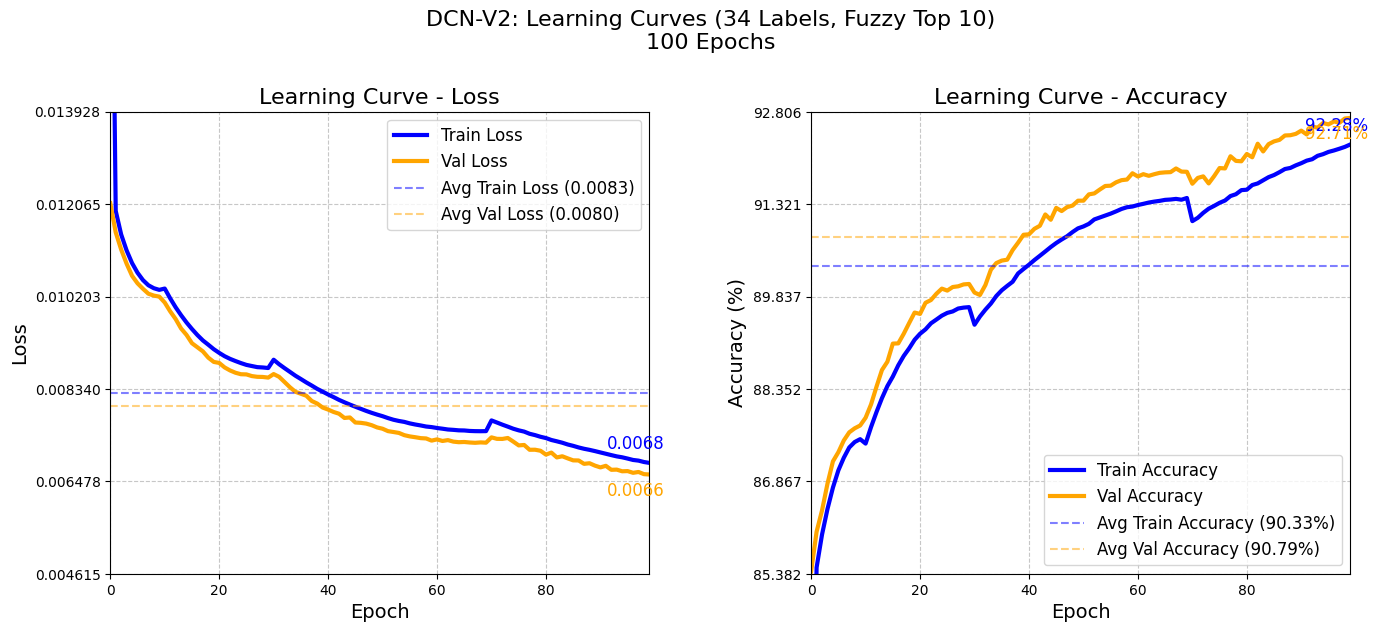

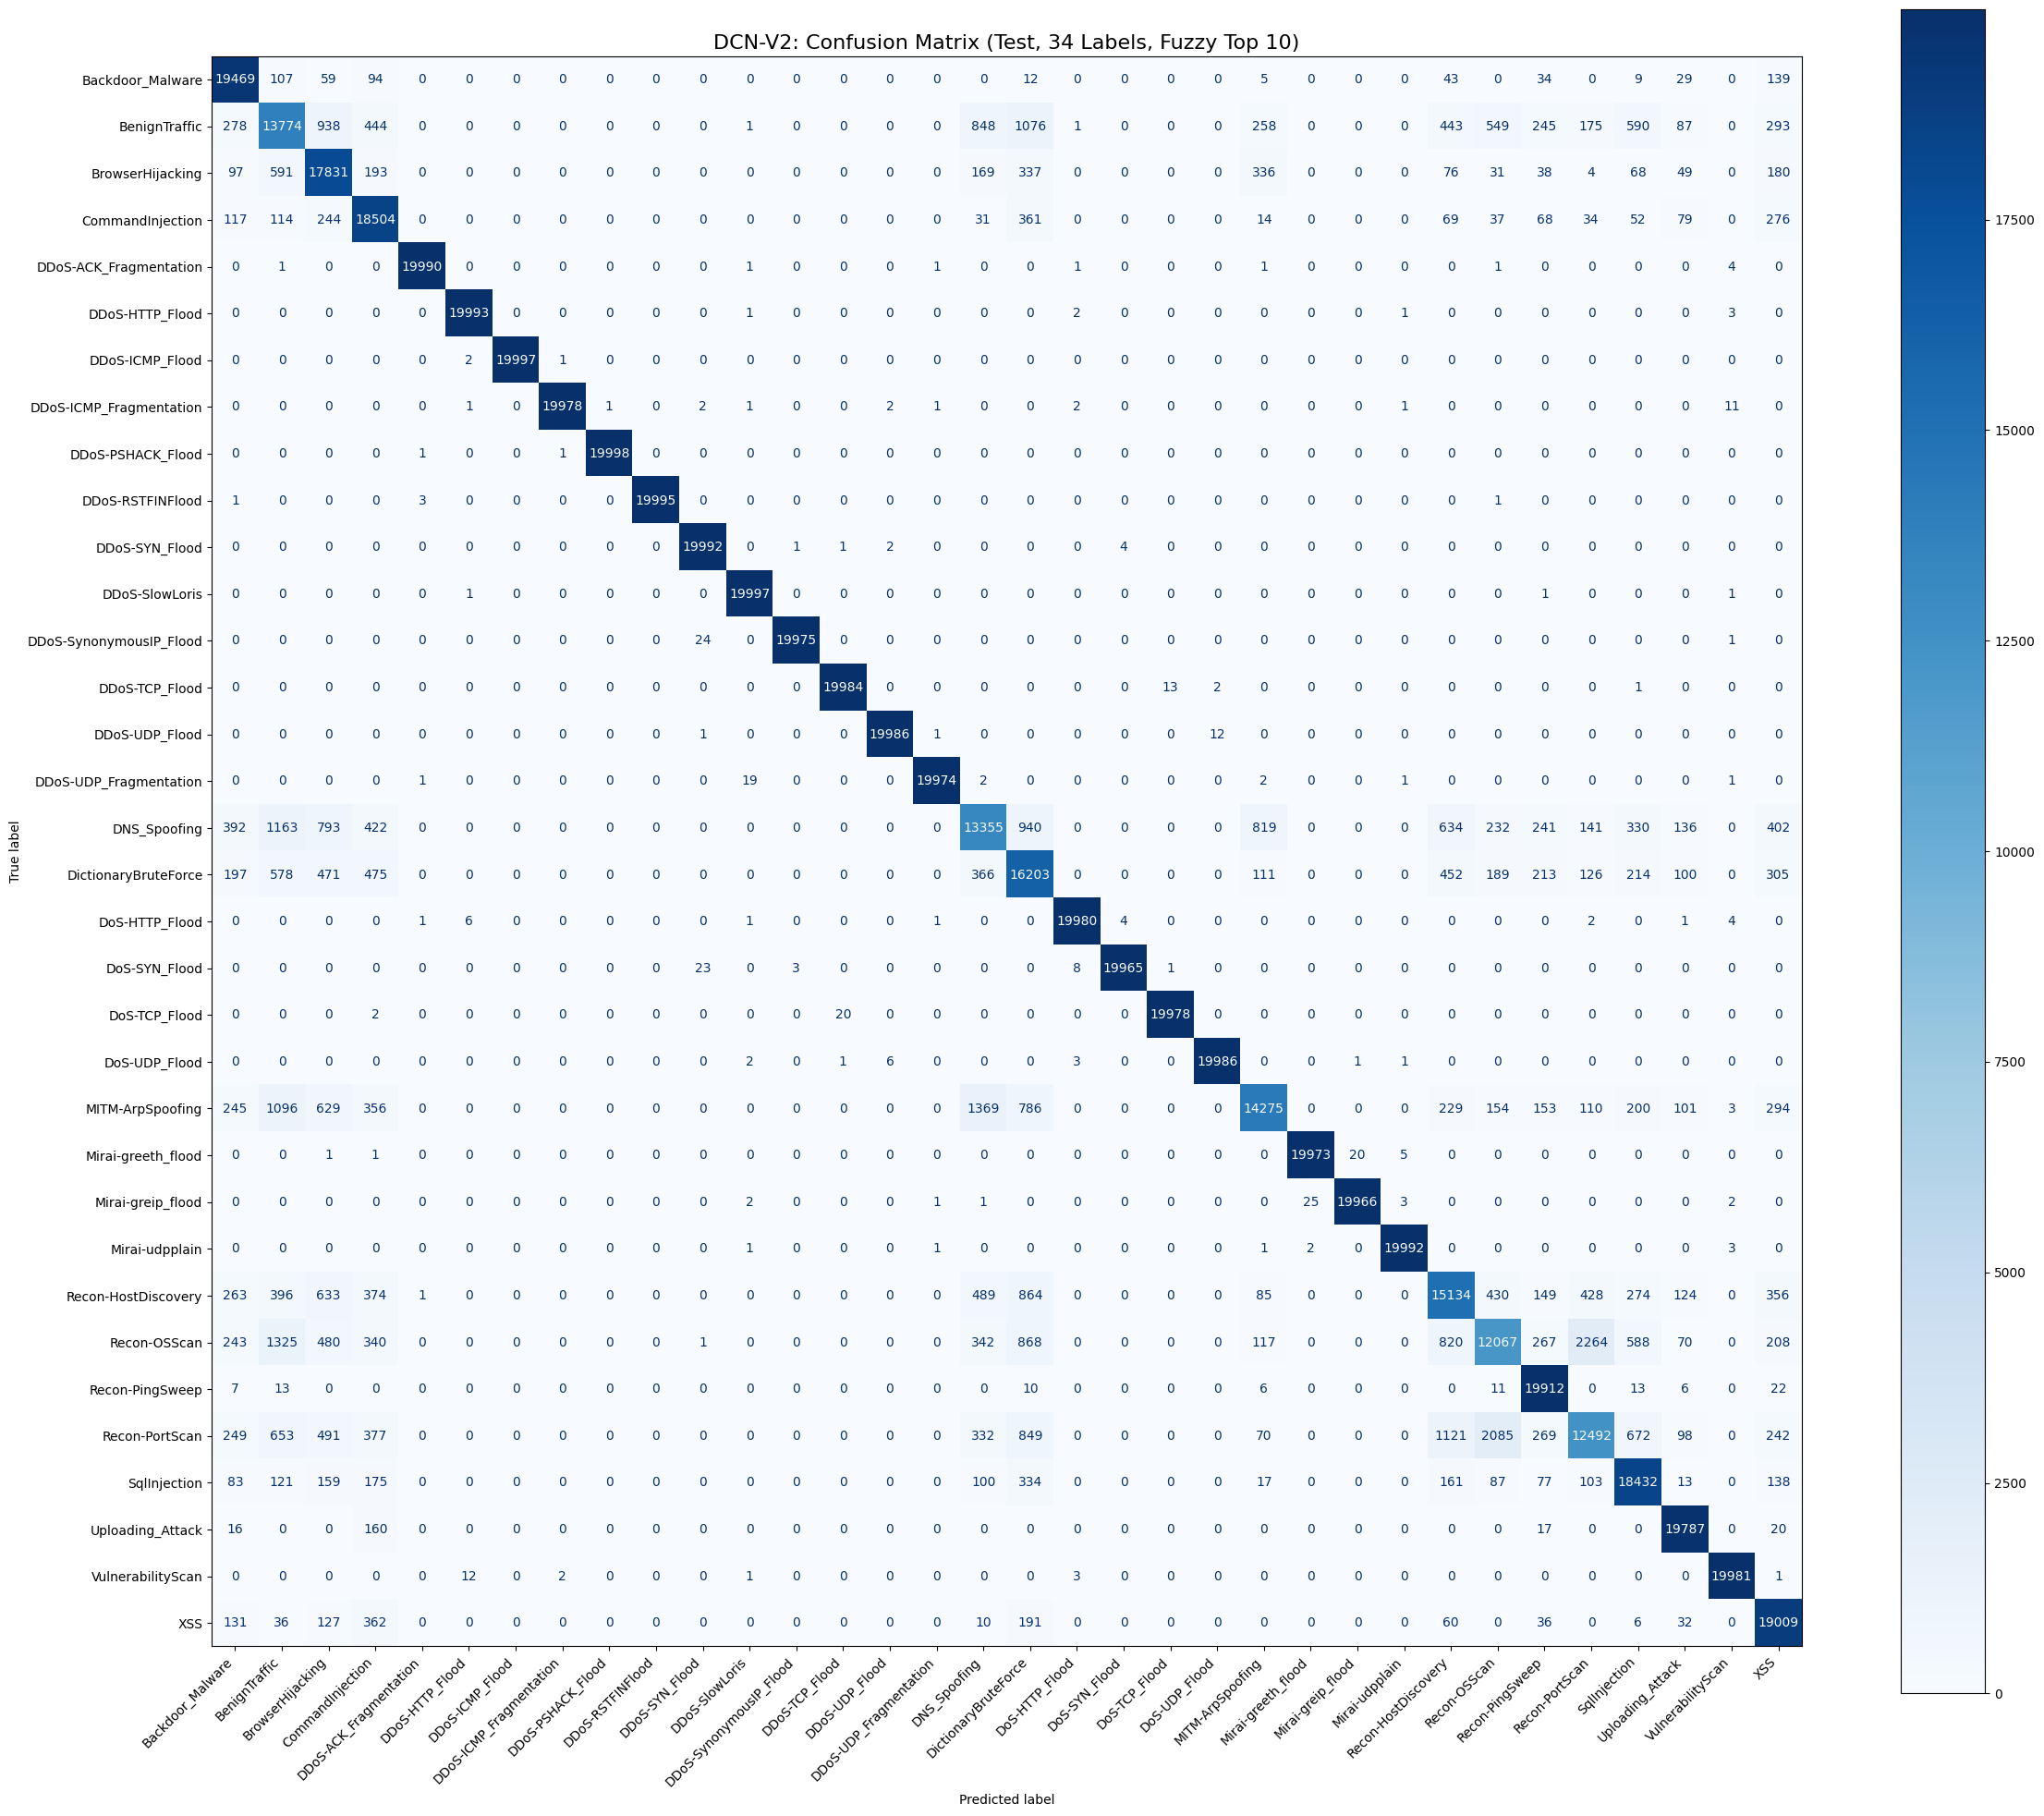

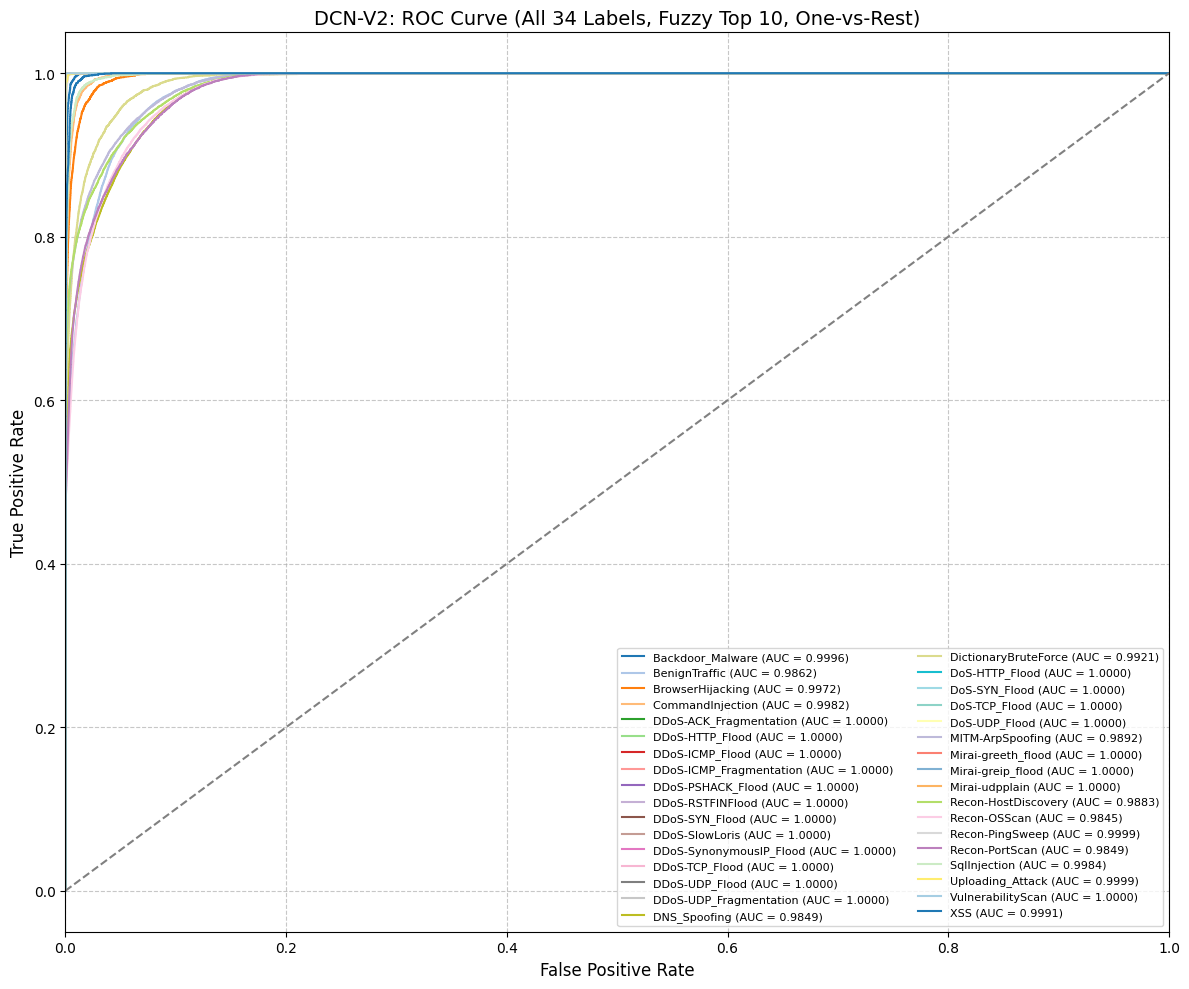

📈 Macro-average ROC-AUC Score (Multi-class, 34 Labels): 0.9971
Shape of test_features: (680000, 34)


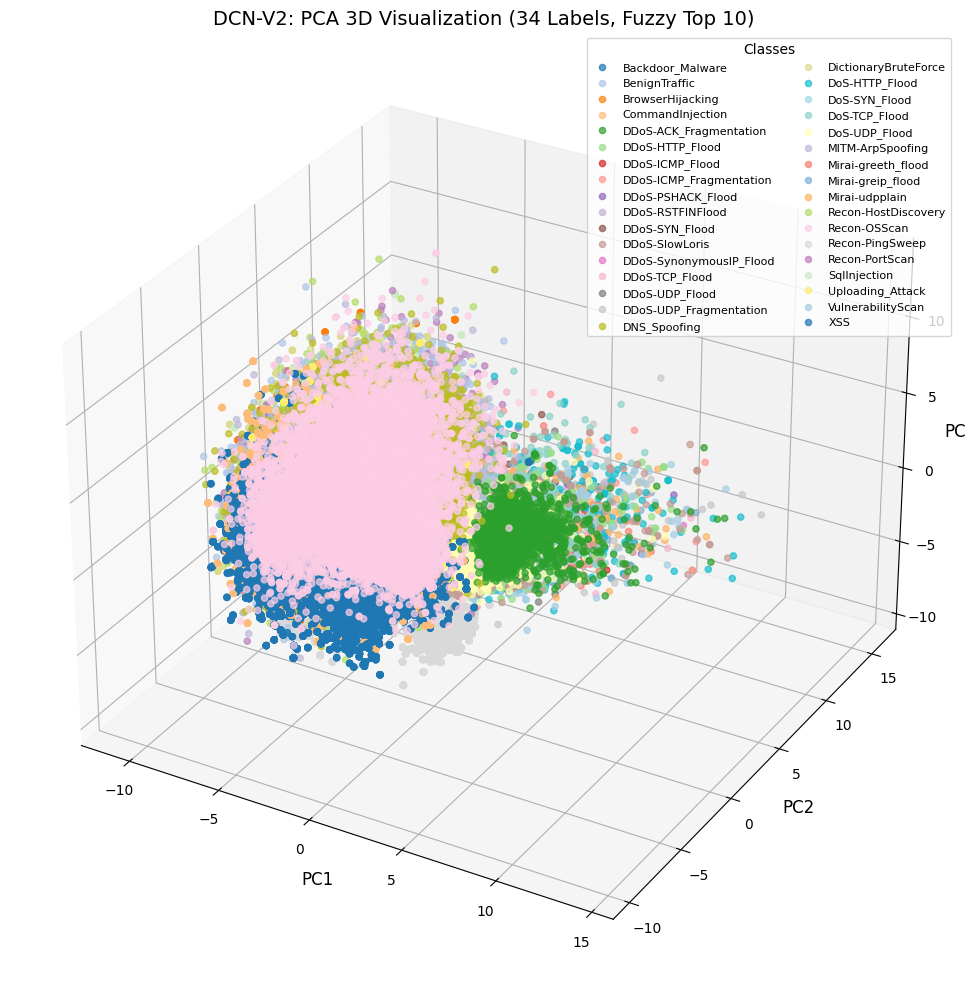

Shape of feature_importance: (340,)


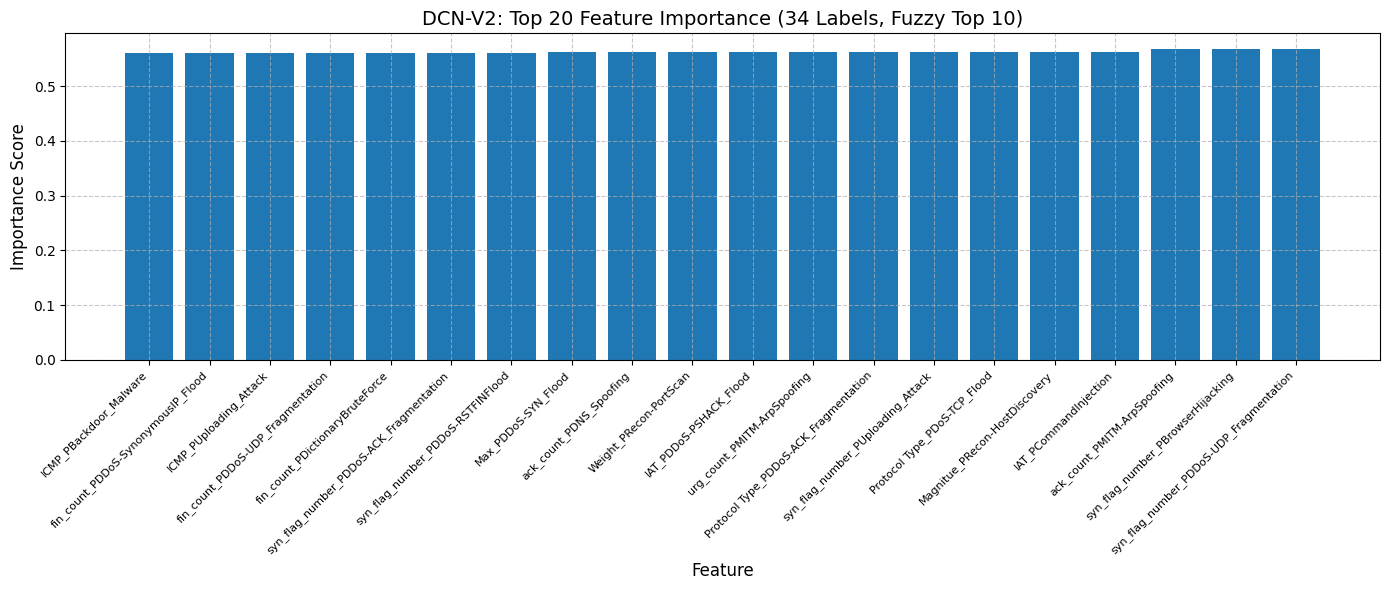

⏱️ Thời gian huấn luyện trung bình mỗi epoch: 41.30 giây

📊 Giá trị trung bình (100 epoch):
Train Loss trung bình: 0.0084
Val Loss trung bình: 0.0080
Train Accuracy trung bình: 90.23%
Val Accuracy trung bình: 90.73%


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"  # Thư mục chứa selected_features_top10_34labels.pkl

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_fuzzy_top10_dcnv2.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_fuzzy_top10_dcnv2.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_fuzzy_top10_dcnv2.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_fuzzy_top10_dcnv2.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_fuzzy_top10_dcnv2.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_fuzzy_top10_dcnv2.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_fuzzy_top10_dcnv2.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_fuzzy_top10_dcnv2.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_top10_dcnv2.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_fuzzy_top10_dcnv2.npy")
    print("✅ Đã tải tất cả dữ liệu cần thiết cho DCN-V2 (34 nhãn, fuzzy top 10)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 100  # 100 epoch
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'Backdoor_Malware', 1: 'BenignTraffic', 2: 'BrowserHijacking', 3: 'CommandInjection',
    4: 'DDoS-ACK_Fragmentation', 5: 'DDoS-HTTP_Flood', 6: 'DDoS-ICMP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-PSHACK_Flood', 9: 'DDoS-RSTFINFlood', 10: 'DDoS-SYN_Flood', 11: 'DDoS-SlowLoris',
    12: 'DDoS-SynonymousIP_Flood', 13: 'DDoS-TCP_Flood', 14: 'DDoS-UDP_Flood', 15: 'DDoS-UDP_Fragmentation',
    16: 'DNS_Spoofing', 17: 'DictionaryBruteForce', 18: 'DoS-HTTP_Flood', 19: 'DoS-SYN_Flood',
    20: 'DoS-TCP_Flood', 21: 'DoS-UDP_Flood', 22: 'MITM-ArpSpoofing', 23: 'Mirai-greeth_flood',
    24: 'Mirai-greip_flood', 25: 'Mirai-udpplain', 26: 'Recon-HostDiscovery', 27: 'Recon-OSScan',
    28: 'Recon-PingSweep', 29: 'Recon-PortScan', 30: 'SqlInjection', 31: 'Uploading_Attack',
    32: 'VulnerabilityScan', 33: 'XSS'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Lấy 20 màu từ tab20
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))  # Lấy 12 màu từ Set3
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))  # Lấy 12 màu từ Paired
# Kết hợp các bảng màu và đảm bảo đủ 34 màu khác nhau
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))  # Tổng cộng 34 màu
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(len(train_losses))
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs  # Sử dụng trực tiếp 0-99

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 99)
ax1.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
loss_min = min(train_losses_plot[1:].min(), val_losses_plot[1:].min())
loss_max = max(train_losses_plot[1:].max(), val_losses_plot[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_loss = np.mean(train_losses_plot[1:])
avg_val_loss = np.mean(val_losses_plot[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", (99, train_losses_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", (99, val_losses_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 99)
ax2.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
acc_min = min(train_accuracies_plot[1:].min(), val_accuracies_plot[1:].min())
acc_max = max(train_accuracies_plot[1:].max(), val_accuracies_plot[1:].max())
ax2.set_ylim(acc_min - 0.1, acc_max + 0.1)
ax2.set_yticks(np.linspace(acc_min - 0.1, acc_max + 0.1, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_accuracy = np.mean(train_accuracies_plot[1:])
avg_val_accuracy = np.mean(val_accuracies_plot[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", (99, train_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", (99, val_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

# Thêm tiêu đề chính
plt.suptitle("DCN-V2: Learning Curves (34 Labels, Fuzzy Top 10)\n100 Epochs", 
             fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{results_dir}/learning_curves_dcnv2_34labels_fuzzy_top10.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))  # Tăng kích thước lớn hơn để các ô rõ ràng
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
# Điều chỉnh kích thước font để dễ đọc
for text in disp.text_.ravel():
    text.set_fontsize(10)  # Tăng kích thước font của số liệu trong ô
plt.title("DCN-V2: Confusion Matrix (Test, 34 Labels, Fuzzy Top 10)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_dcnv2_34labels_fuzzy_top10.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, one-vs-rest, vẽ đủ 34 nhãn)
plt.figure(figsize=(12, 10))
for i in range(34):  # Vẽ cho tất cả 34 nhãn
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("DCN-V2: ROC Curve (All 34 Labels, Fuzzy Top 10, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)  # Chia legend thành 2 cột để dễ đọc
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_dcnv2_34labels_fuzzy_top10_all.png", bbox_inches="tight")
plt.show()

# Tính macro-average ROC-AUC cho tất cả nhãn
macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 Macro-average ROC-AUC Score (Multi-class, 34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

# Kiểm tra số mẫu
if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    # Apply PCA với n_components=3
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        
        # 3D Plot
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):  # Vẽ cho tất cả 34 nhãn
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("DCN-V2: PCA 3D Visualization (34 Labels, Fuzzy Top 10)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)  # Chia legend thành 2 cột
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_dcnv2_34labels_fuzzy_top10.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
# Giả định feature_importance có shape (batch_size, input_dim), lấy trung bình theo batch
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

# Tạo nhãn cho các đặc trưng (input_dim=340, từ 10 đặc trưng * 34 nhãn)
input_dim = 340  # Từ code huấn luyện/test
# Giả định 10 đặc trưng được chọn (cần danh sách cụ thể từ file xử lý dữ liệu)
try:
    selected_features = np.load(f"{output_dir}/selected_features_top10_34labels.pkl", allow_pickle=True)
except Exception as e:
    print(f"❌ Lỗi khi tải selected_features_top10_34labels.pkl: {str(e)}")
    # Sử dụng danh sách giả định nếu file không tồn tại
    selected_features = ['IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 'Protocol Type', 'rst_count']

feature_labels = []
for i in range(input_dim):
    feature_idx = i // 34  # Đặc trưng thứ mấy trong 10 đặc trưng
    label_idx = i % 34     # Nhãn thứ mấy trong 34 nhãn
    feature_labels.append(f"{selected_features[feature_idx]}_P{label_map[label_idx]}")

# Vẽ biểu đồ Feature Importance (chỉ hiển thị top 20 để tránh rối)
top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("DCN-V2: Top 20 Feature Importance (34 Labels, Fuzzy Top 10)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_dcnv2_34labels_fuzzy_top10.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print("\n📊 Giá trị trung bình (100 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **MÔ HÌNH AUTOINT**

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# AutoInt
class AutoInt(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=32, n_layers=2, n_heads=4, dropout=0.1):
        super(AutoInt, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.dropout = dropout

        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.embedding = nn.Linear(1, embed_dim)
        nn.init.xavier_normal_(self.embedding.weight, gain=0.1)

        self.attention_layers = nn.ModuleList([
            nn.MultiheadAttention(embed_dim=embed_dim, num_heads=n_heads, dropout=dropout, batch_first=True)
            for _ in range(n_layers)
        ])
        self.attention_norms = nn.ModuleList([nn.LayerNorm(embed_dim) for _ in range(n_layers)])
        self.dropout_layer = nn.Dropout(dropout)

        self.importance_layer = nn.Linear(input_dim, input_dim)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)

        self.fc_output = nn.Linear(embed_dim, num_classes)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        x_embed = torch.stack([self.embedding(x[:, i:i+1]) for i in range(self.input_dim)], dim=1)
        
        for attn, norm in zip(self.attention_layers, self.attention_norms):
            attn_output, _ = attn(x_embed, x_embed, x_embed)
            x_embed = norm(x_embed + self.dropout_layer(attn_output))

        embeddings = x_embed.mean(dim=1)
        output = self.fc_output(embeddings)

        if torch.isnan(output).any() or torch.isnan(sparsity_loss).any():
            tqdm.write(f"NaN detected in output or sparsity_loss")

        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu fuzzy từ XGBoost (34 nhãn)
try:
    X_train_fuzzy = np.load(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_fuzzy = np.load(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_fuzzy = np.load(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write("✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn, 340 đặc trưng)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Chuẩn hóa dữ liệu
try:
    X_train_fuzzy = (X_train_fuzzy - X_train_fuzzy.mean(axis=0)) / (X_train_fuzzy.std(axis=0) + 1e-6)
    X_val_fuzzy = (X_val_fuzzy - X_val_fuzzy.mean(axis=0)) / (X_val_fuzzy.std(axis=0) + 1e-6)
    X_test_fuzzy = (X_test_fuzzy - X_test_fuzzy.mean(axis=0)) / (X_test_fuzzy.std(axis=0) + 1e-6)
except Exception as e:
    tqdm.write(f"❌ Lỗi khi chuẩn hóa dữ liệu: {str(e)}")
    raise

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_fuzzy)) or np.any(np.isinf(X_train_fuzzy)):
    tqdm.write("⚠️ X_train_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_fuzzy)) or np.any(np.isinf(X_val_fuzzy)):
    tqdm.write("⚠️ X_val_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_fuzzy)) or np.any(np.isinf(X_test_fuzzy)):
    tqdm.write("⚠️ X_test_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor với float16 để tiết kiệm bộ nhớ
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_fuzzy, dtype=torch.float16).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_fuzzy, dtype=torch.float16).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_fuzzy, dtype=torch.float16).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình
input_dim = X_train_fuzzy.shape[1]  # 340 (10 đặc trưng * 34 nhãn)
model = AutoInt(input_dim=input_dim, num_classes=34, embed_dim=32, n_layers=2, n_heads=4, dropout=0.1).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 100
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Danh sách 34 nhãn từ code đọc dữ liệu
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Hàm kiểm tra bộ nhớ GPU
def print_gpu_memory():
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated() / 1024**3  # GB
        reserved = torch.cuda.memory_reserved() / 1024**3    # GB
        tqdm.write(f"GPU Memory - Allocated: {allocated:.2f} GB, Reserved: {reserved:.2f} GB")

# Huấn luyện
tqdm.write("Training AutoInt with Focal + Sparsity Loss (34 Labels, 340 Features)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch in pbar:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            optimizer.zero_grad()
            
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"NaN detected in total_loss at batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss).backward()
            scaler.unscale_(optimizer)
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")
                print_gpu_memory()

            # Giải phóng bộ nhớ
            del X_batch, Y_batch, outputs, sparsity_loss, masks, total_loss, focal_loss
            torch.cuda.empty_cache()

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

                # Giải phóng bộ nhớ
                del X_batch, Y_batch, outputs, sparsity_loss, loss, focal_loss
                torch.cuda.empty_cache()

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Confusion Matrix:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")
    print_gpu_memory()

    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/autoint_34labels_fuzzy_xgb.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/autoint_34labels_fuzzy_xgb_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/autoint_34labels_fuzzy_xgb_final.pth")

# Lưu dữ liệu đánh giá
np.save(f"{results_dir}/train_losses_34labels_fuzzy_xgb_autoint.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_autoint.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_fuzzy_xgb_autoint.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_autoint.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_fuzzy_xgb_autoint.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_fuzzy_xgb_autoint.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_fuzzy_xgb_autoint.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_autoint.npy", np.array(epoch_times))
total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_34labels_fuzzy_xgb_autoint.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_34labels_fuzzy_xgb_autoint.npy", np.array([avg_epoch_time]))
tqdm.write(f"📊 Tổng thời gian huấn luyện: {total_time:.2f}s")
tqdm.write(f"📊 Thời gian huấn luyện trung bình mỗi epoch: {avg_epoch_time:.2f}s")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/autoint_34labels_fuzzy_xgb.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

            # Giải phóng bộ nhớ
            del X_batch, Y_batch, outputs, sparsity_loss, masks, probs
            torch.cuda.empty_cache()

    print_gpu_memory()

test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Confusion Matrix (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Confusion Matrix:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Warning: Inconsistent mask shapes: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_autoint.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_fuzzy_xgb_autoint.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_fuzzy_xgb_autoint.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_fuzzy_xgb_autoint.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_autoint.npy", avg_mask)

avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)

with open(f"{results_dir}/AutoInt_34labels_fuzzy_xgb.txt", 'w') as f:
    f.write("Kết quả huấn luyện AutoInt\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/AutoInt_34labels_fuzzy_xgb.txt")

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn, 340 đặc trưng)
Training AutoInt with Focal + Sparsity Loss (34 Labels, 340 Features)


OutOfMemoryError: CUDA out of memory. Tried to allocate 7.06 GiB. GPU 0 has a total capacity of 14.74 GiB of which 5.28 GiB is free. Process 3649 has 9.46 GiB memory in use. Of the allocated memory 6.26 GiB is allocated by PyTorch, and 199.81 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

# **MÔ HÌNH TABNET**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.cuda.amp import GradScaler, autocast

# Định nghĩa các lớp FocalLoss, GhostBN1d, TabNet
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

def entmax15(x, dim=-1):
    x = F.softmax(x * 1.5, dim=dim)
    return x

class TabNet(nn.Module):
    def __init__(self, input_dim, num_classes, n_d=64, n_a=64, n_steps=5, gamma=1.3, lambda_sparse=5e-4):
        super(TabNet, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.n_d = n_d
        self.n_a = n_a
        self.n_steps = n_steps
        self.gamma = gamma
        self.lambda_sparse = lambda_sparse

        # BatchNorm đầu vào
        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)

        # Lớp FC ban đầu
        self.initial_fc = nn.Linear(input_dim, n_d + n_a)
        nn.init.xavier_normal_(self.initial_fc.weight)
        nn.init.zeros_(self.initial_fc.bias)

        # Các lớp chú ý và quyết định
        self.attention_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(n_a, input_dim),
                nn.BatchNorm1d(input_dim),
                nn.ReLU()
            ) for _ in range(n_steps)
        ])
        self.decision_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_dim, n_d),
                nn.BatchNorm1d(n_d),
                nn.ReLU(),
                nn.Dropout(0.1)  # Đồng bộ với dropout của AutoInt
            ) for _ in range(n_steps)
        ])

        # Lớp đầu ra
        self.fc_output = nn.Linear(n_d * n_steps, num_classes)
        nn.init.xavier_normal_(self.fc_output.weight)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        prior = torch.ones_like(x)
        outputs = []
        sparsity_loss = 0
        masks = []

        for step in range(self.n_steps):
            att = self.initial_fc(x)
            att_d, att_a = att[:, :self.n_d], att[:, self.n_d:]
            mask = self.attention_layers[step](att_a)
            mask = entmax15(mask, dim=1)
            
            entropy = -torch.sum(mask * torch.log(mask + 1e-8), dim=1)
            sparsity_loss += torch.mean(entropy) / self.n_steps / self.input_dim
            masks.append(mask)

            prior = prior * (self.gamma - mask)
            masked_x = x * mask
            out = self.decision_layers[step](masked_x)
            outputs.append(out)

        combined = torch.cat(outputs, dim=1)
        output = self.fc_output(combined)
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu fuzzy từ XGBoost (34 nhãn)
try:
    X_train_fuzzy = np.load(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_fuzzy = np.load(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_fuzzy = np.load(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write("✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn, 340 đặc trưng)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Chuẩn hóa dữ liệu
try:
    X_train_fuzzy = (X_train_fuzzy - X_train_fuzzy.mean(axis=0)) / (X_train_fuzzy.std(axis=0) + 1e-6)
    X_val_fuzzy = (X_val_fuzzy - X_val_fuzzy.mean(axis=0)) / (X_val_fuzzy.std(axis=0) + 1e-6)
    X_test_fuzzy = (X_test_fuzzy - X_test_fuzzy.mean(axis=0)) / (X_test_fuzzy.std(axis=0) + 1e-6)
except Exception as e:
    tqdm.write(f"❌ Lỗi khi chuẩn hóa dữ liệu: {str(e)}")
    raise

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_fuzzy)) or np.any(np.isinf(X_train_fuzzy)):
    tqdm.write("⚠️ X_train_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_fuzzy)) or np.any(np.isinf(X_val_fuzzy)):
    tqdm.write("⚠️ X_val_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_fuzzy)) or np.any(np.isinf(X_test_fuzzy)):
    tqdm.write("⚠️ X_test_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_fuzzy, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_fuzzy, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_fuzzy, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình và tối ưu hóa
input_dim = X_train_fuzzy.shape[1]  # 340 (10 đặc trưng * 34 nhãn)
model = TabNet(input_dim=input_dim, num_classes=34, n_d=64, n_a=64, n_steps=5, gamma=1.3, lambda_sparse=5e-4).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler()

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 100
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Danh sách 34 nhãn từ code đọc dữ liệu
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Hàm kiểm tra bộ nhớ GPU
def print_gpu_memory():
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated() / 1024**3  # GB
        reserved = torch.cuda.memory_reserved() / 1024**3    # GB
        tqdm.write(f"GPU Memory - Allocated: {allocated:.2f} GB, Reserved: {reserved:.2f} GB")

# Huấn luyện
tqdm.write("Training TabNet with Focal + Sparsity Loss (34 Labels, 340 Features)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch in pbar:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            optimizer.zero_grad()
            
            with autocast():
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            scaler.scale(total_loss).backward()
            scaler.unscale_(optimizer)
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean()
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")
                print_gpu_memory()

            # Giải phóng bộ nhớ
            del X_batch, Y_batch, outputs, sparsity_loss, masks, total_loss, focal_loss
            torch.cuda.empty_cache()

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast():
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

                # Giải phóng bộ nhớ
                del X_batch, Y_batch, outputs, sparsity_loss, loss, focal_loss
                torch.cuda.empty_cache()

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    # Phân tích nhầm lẫn
    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Confusion Matrix:\n{cm}")
    tqdm.write(f"Top 5 cặp nhầm lẫn nhiều nhất: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")
    print_gpu_memory()

    # Lưu mô hình nếu F1 tốt hơn
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/tabnet_34labels_fuzzy_xgb.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/tabnet_34labels_fuzzy_xgb_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/tabnet_34labels_fuzzy_xgb_final.pth")

# Lưu dữ liệu
np.save(f"{results_dir}/train_losses_34labels_fuzzy_xgb_tabnet.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_tabnet.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_fuzzy_xgb_tabnet.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_tabnet.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_fuzzy_xgb_tabnet.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_fuzzy_xgb_tabnet.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_fuzzy_xgb_tabnet.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_tabnet.npy", np.array(epoch_times))
total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_34labels_fuzzy_xgb_tabnet.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_34labels_fuzzy_xgb_tabnet.npy", np.array([avg_epoch_time]))
tqdm.write(f"📊 Tổng thời gian huấn luyện: {total_time:.2f}s")
tqdm.write(f"📊 Thời gian huấn luyện trung bình mỗi epoch: {avg_epoch_time:.2f}s")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/tabnet_34labels_fuzzy_xgb.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast():
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

            # Giải phóng bộ nhớ
            del X_batch, Y_batch, outputs, sparsity_loss, masks, probs
            torch.cuda.empty_cache()

    print_gpu_memory()

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Confusion Matrix (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Confusion Matrix:\n{cm}")
tqdm.write(f"Top 5 cặp nhầm lẫn nhiều nhất: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Lưu dữ liệu cho biểu đồ
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Warning: Inconsistent mask shapes: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_tabnet.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_fuzzy_xgb_tabnet.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_fuzzy_xgb_tabnet.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_fuzzy_xgb_tabnet.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_tabnet.npy", avg_mask)

# Lưu kết quả vào file văn bản
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)

with open(f"{results_dir}/TabNet_34labels_fuzzy_xgb.txt", 'w') as f:
    f.write("Kết quả huấn luyện TabNet\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/TabNet_34labels_fuzzy_xgb.txt")

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Average Epoch Time: {avg_epoch_time:.2f}s")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn, 340 đặc trưng)


/tmp/ipykernel_31/586814035.py:198: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Training TabNet with Focal + Sparsity Loss (34 Labels, 340 Features)


Training Batch (Epoch 1/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Training Batch (Epoch 1/100):   1%|          | 3/539 [00:01<03:28,  2.57batch/s, loss=0.0977]

Batch 1: Outputs max/min: 10.5625/-13.9609, Focal Loss: 0.1050, Sparsity Loss: 0.0152, Grad Norm: 0.0975, Mask sum: 1.0000
GPU Memory - Allocated: 8.45 GB, Reserved: 10.78 GB
Batch 2: Outputs max/min: 20.1875/-25.5469, Focal Loss: 0.1023, Sparsity Loss: 0.0152, Grad Norm: 0.0955, Mask sum: 1.0000
GPU Memory - Allocated: 8.45 GB, Reserved: 8.66 GB
Batch 2: Outputs max/min: 16.0469/-28.4375, Focal Loss: 0.1000, Sparsity Loss: 0.0152, Grad Norm: 0.0958, Mask sum: 1.0000
GPU Memory - Allocated: 8.45 GB, Reserved: 8.66 GB
Batch 4: Outputs max/min: 15.5859/-13.1250, Focal Loss: 0.0977, Sparsity Loss: 0.0152, Grad Norm: 0.0947, Mask sum: 1.0000
GPU Memory - Allocated: 8.45 GB, Reserved: 8.66 GB


Training Batch (Epoch 1/100):   1%|▏         | 8/539 [00:02<01:34,  5.63batch/s, loss=0.0877]

Batch 4: Outputs max/min: 17.9219/-14.9922, Focal Loss: 0.0946, Sparsity Loss: 0.0152, Grad Norm: 0.0952, Mask sum: 1.0000
GPU Memory - Allocated: 8.45 GB, Reserved: 8.66 GB


Validation (Epoch 1):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 1/100: Train Loss: 0.0205, Val Loss: 0.0129, Train Acc: 78.92%, Val Acc: 84.89%, F1: 0.8500, Precision: 0.8561, Recall: 0.8489, Time: 49.68s
Phân bố dự đoán (Validation): [14579 19985 13625 12325 15010 15070 14976 14968 14975 14972 14925 15101
 14986 14954 14986 14987 13880 14531 15118 14872 15051 14979 12900 14968
 14992 14972 13468 10553 15345 12220 19336 21345 15133 15913]
Confusion Matrix:
[[ 8957   626   344 ...  1378     8   920]
 [  311 10398   704 ...   258     0   326]
 [  602  1094  9284 ...   767     0   825]
 ...
 [  324   225   165 ... 11019     0  1023]
 [    0     1     0 ...     0 14824     0]
 [  969   434   372 ...  2039     0  8183]]
Top 5 cặp nhầm lẫn nhiều nhất: [('Mirai-udpplain', 'BenignTraffic', 3062), ('SqlInjection', 'Backdoor_Malware', 2645), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2074), ('CommandInjection', 'Mirai-greeth_flood', 2051), ('DDoS-PSHACK_Flood', 'Mirai-udpplain', 2043)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt 

Training Batch (Epoch 2/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 2):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 2/100: Train Loss: 0.0128, Val Loss: 0.0121, Train Acc: 84.88%, Val Acc: 85.54%, F1: 0.8570, Precision: 0.8660, Recall: 0.8554, Time: 48.89s
Phân bố dự đoán (Validation): [13751 19979 13935 10932 15021 15053 14982 14955 14987 14991 14981 15065
 14970 14970 15001 14983 13826 15458 15053 14962 15032 14991 12747 14984
 15000 15000 12893  9816 13112 12664 19283 23651 15028 17944]
Confusion Matrix:
[[ 9025   604   329 ...  1616     8  1186]
 [  276 10512   682 ...   390     0   333]
 [  387  1102  9590 ...   886     0   879]
 ...
 [  240   195   139 ... 11903     0   976]
 [    0     0     1 ...     0 14885     0]
 [  710   438   431 ...  1931     0  9104]]
Top 5 cặp nhầm lẫn nhiều nhất: [('Mirai-udpplain', 'BenignTraffic', 2907), ('SqlInjection', 'Backdoor_Malware', 2679), ('DDoS-PSHACK_Flood', 'Mirai-udpplain', 2014), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1985), ('DDoS-ICMP_Flood', 'BenignTraffic', 1896)]
GPU Memory - Allocated: 8.44 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất t

Training Batch (Epoch 3/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 3):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 3/100: Train Loss: 0.0122, Val Loss: 0.0117, Train Acc: 85.43%, Val Acc: 85.86%, F1: 0.8601, Precision: 0.8681, Recall: 0.8586, Time: 48.43s
Phân bố dự đoán (Validation): [14825 20315 16106 11453 15019 15032 14981 14966 14988 14993 15006 15040
 14977 14979 15010 14982 13442 13239 15054 14954 15027 14988 11991 15018
 14973 14993 13095 10268 13542 12587 20721 20160 15025 18251]
Confusion Matrix:
[[ 9365   596   476 ...  1161     8  1207]
 [  306 10665   785 ...   266     0   356]
 [  412  1069 10071 ...   647     2   787]
 ...
 [  314   208   294 ... 11650     0  1172]
 [    0     0     1 ...     0 14913     0]
 [  835   393   595 ...  1472     0  9195]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2669), ('Mirai-udpplain', 'BenignTraffic', 2644), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2167), ('DDoS-ICMP_Flood', 'BenignTraffic', 2042), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1854)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất tại 

Training Batch (Epoch 4/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 4):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 4/100: Train Loss: 0.0118, Val Loss: 0.0114, Train Acc: 85.81%, Val Acc: 86.25%, F1: 0.8632, Precision: 0.8699, Recall: 0.8625, Time: 48.22s
Phân bố dự đoán (Validation): [14795 17390 15262 12847 15016 15022 14984 14966 14994 14995 15012 15033
 14980 14985 15014 14985 13466 13855 15040 14964 15021 14991 12532 15004
 14984 14992 13580  9892 15165 11924 19628 23575 15018 16089]
Confusion Matrix:
[[ 9495   435   312 ...  1460     8   947]
 [  328 10112   814 ...   364     0   317]
 [  417   828 10088 ...   824     0   654]
 ...
 [  221   132   190 ... 12746     0   713]
 [    0     0     1 ...     0 14932     0]
 [  788   311   459 ...  1808     0  9027]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2521), ('Mirai-udpplain', 'BenignTraffic', 2521), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1952), ('DDoS-PSHACK_Flood', 'Mirai-udpplain', 1891), ('DDoS-ICMP_Flood', 'BenignTraffic', 1735)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất t

Training Batch (Epoch 5/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 5):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 5/100: Train Loss: 0.0115, Val Loss: 0.0112, Train Acc: 86.13%, Val Acc: 86.49%, F1: 0.8657, Precision: 0.8726, Recall: 0.8649, Time: 48.37s
Phân bố dự đoán (Validation): [14340 18399 15911 12061 15004 15013 14988 14971 14994 14997 15014 15044
 14986 14990 15010 14989 14061 14364 15026 14967 15013 14988 12106 14997
 14993 14997 13866  9720 13796 12386 19411 21768 15019 17811]
Confusion Matrix:
[[ 9584   484   406 ...  1254     8  1077]
 [  287 10393   777 ...   311     0   336]
 [  382   917 10215 ...   706     0   714]
 ...
 [  152   119   274 ... 12692     0   841]
 [    0     0     1 ...     0 14934     0]
 [  689   314   538 ...  1453     0  9603]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2553), ('Mirai-udpplain', 'BenignTraffic', 2294), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2153), ('DDoS-ICMP_Flood', 'BenignTraffic', 1766), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1694)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất tại 

Training Batch (Epoch 6/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 6):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 6/100: Train Loss: 0.0114, Val Loss: 0.0111, Train Acc: 86.37%, Val Acc: 86.67%, F1: 0.8675, Precision: 0.8746, Recall: 0.8667, Time: 48.25s
Phân bố dự đoán (Validation): [14840 16314 16989 12595 15005 15016 14989 14971 14996 14997 15014 15042
 14991 14993 15010 14986 13423 14048 15019 14971 15010 14988 12131 14972
 15016 14998 13248 10300 13840 11784 19966 23058 15014 17466]
Confusion Matrix:
[[ 9781   374   406 ...  1277     8  1084]
 [  355  9965  1016 ...   362     0   328]
 [  394   654 10532 ...   745     0   724]
 ...
 [  130    94   234 ... 13106     0   673]
 [    0     0     1 ...     0 14938     0]
 [  689   230   511 ...  1586     0  9622]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2551), ('Mirai-udpplain', 'BenignTraffic', 2259), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1925), ('DDoS-ICMP_Flood', 'BenignTraffic', 1773), ('DDoS-PSHACK_Flood', 'Mirai-udpplain', 1735)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất t

Training Batch (Epoch 7/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 7):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 7/100: Train Loss: 0.0112, Val Loss: 0.0110, Train Acc: 86.57%, Val Acc: 86.84%, F1: 0.8689, Precision: 0.8750, Recall: 0.8684, Time: 48.97s
Phân bố dự đoán (Validation): [14695 17229 16394 12621 15002 15016 14991 14971 14997 14998 15013 15034
 14989 14993 15010 14984 13616 14042 15023 14977 15009 14988 12283 14976
 15011 15001 13214 10465 14120 13013 18173 24198 15017 15937]
Confusion Matrix:
[[ 9847   402   399 ...  1419     8   913]
 [  319 10179   904 ...   398     0   282]
 [  403   752 10414 ...   835     0   595]
 ...
 [  112    68   205 ... 13474     0   454]
 [    0     0     1 ...     0 14942     0]
 [  673   267   500 ...  1693     0  9426]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2760), ('Mirai-udpplain', 'BenignTraffic', 2147), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1900), ('DDoS-PSHACK_Flood', 'Mirai-udpplain', 1763), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1656)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất t

Training Batch (Epoch 8/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 8):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 8/100: Train Loss: 0.0111, Val Loss: 0.0109, Train Acc: 86.70%, Val Acc: 86.93%, F1: 0.8698, Precision: 0.8753, Recall: 0.8693, Time: 48.16s
Phân bố dự đoán (Validation): [15739 17323 17209 12306 15003 15014 14990 14972 14998 14999 15013 15041
 14991 14996 15009 14985 13182 14755 15018 14973 15008 14989 12078 14978
 15012 14997 13522 11094 14170 11830 18395 21286 15014 17111]
Confusion Matrix:
[[10129   411   425 ...  1083     8   918]
 [  365 10230   990 ...   278     0   304]
 [  434   695 10639 ...   622     0   687]
 ...
 [  209    68   255 ... 13046     0   666]
 [    0     0     1 ...     0 14943     0]
 [  801   289   517 ...  1406     0  9710]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2686), ('Mirai-udpplain', 'BenignTraffic', 2072), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1869), ('DDoS-ICMP_Flood', 'BenignTraffic', 1719), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1685)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất tại 

Training Batch (Epoch 9/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 9):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 9/100: Train Loss: 0.0111, Val Loss: 0.0108, Train Acc: 86.79%, Val Acc: 86.97%, F1: 0.8702, Precision: 0.8760, Recall: 0.8697, Time: 48.53s
Phân bố dự đoán (Validation): [15186 17281 16730 12730 15004 15023 14989 14972 14998 14998 15012 15041
 14992 14995 15011 14983 13850 13964 15013 14976 15009 14988 11854 14980
 15009 14999 13128 10598 15110 11915 19552 20930 15008 17172]
Confusion Matrix:
[[10044   408   410 ...  1095     8   991]
 [  336 10228   914 ...   288     0   299]
 [  416   751 10530 ...   629     0   668]
 ...
 [  125    68   253 ... 12960     0   705]
 [    0     0     1 ...     0 14944     0]
 [  742   277   516 ...  1285     0  9758]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2663), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2030), ('Mirai-udpplain', 'BenignTraffic', 1990), ('DDoS-ICMP_Flood', 'BenignTraffic', 1733), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1665)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất tại 

Training Batch (Epoch 10/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 10):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 10/100: Train Loss: 0.0110, Val Loss: 0.0108, Train Acc: 86.81%, Val Acc: 87.02%, F1: 0.8707, Precision: 0.8762, Recall: 0.8702, Time: 48.20s
Phân bố dự đoán (Validation): [15055 17079 16381 12717 15002 15012 14989 14972 14998 14999 15014 15039
 14992 14996 15008 14983 13299 14428 15020 14975 15009 14989 12364 14978
 15013 14996 13154 10518 14922 12111 18245 21363 15016 18364]
Confusion Matrix:
[[10026   370   411 ...  1070     8  1110]
 [  337 10180   901 ...   302     0   346]
 [  396   765 10456 ...   668     0   739]
 ...
 [  139    68   176 ... 13146     0   817]
 [    0     0     1 ...     0 14944     0]
 [  688   258   476 ...  1296     0 10011]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2632), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2182), ('Mirai-udpplain', 'BenignTraffic', 2113), ('DDoS-ICMP_Flood', 'BenignTraffic', 1798), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1666)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất tại

Training Batch (Epoch 11/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 11):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 11/100: Train Loss: 0.0109, Val Loss: 0.0106, Train Acc: 86.94%, Val Acc: 87.34%, F1: 0.8739, Precision: 0.8802, Recall: 0.8734, Time: 48.09s
Phân bố dự đoán (Validation): [15523 16543 17778 11014 15003 15037 14990 14971 14998 14999 14989 15043
 15021 15021 15005 14980 13583 14542 15001 14973 14981 14991 12224 14989
 15006 14995 12903 10610 14684 12489 18528 20415 14997 19174]
Confusion Matrix:
[[10389   356   441 ...   926     0  1135]
 [  327 10102  1002 ...   266     1   373]
 [  379   664 10834 ...   559     0   745]
 ...
 [  115    55   224 ... 13343     0   759]
 [    0     1     1 ...     0 14947     0]
 [  709   196   581 ...  1110     0 10467]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2707), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2078), ('Mirai-udpplain', 'BenignTraffic', 1869), ('DDoS-ICMP_Flood', 'BenignTraffic', 1844), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1666)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất tại

Training Batch (Epoch 12/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 12):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 12/100: Train Loss: 0.0106, Val Loss: 0.0103, Train Acc: 87.33%, Val Acc: 87.69%, F1: 0.8768, Precision: 0.8813, Recall: 0.8769, Time: 48.12s
Phân bố dự đoán (Validation): [15172 15678 19138 12159 15003 15017 14996 14969 14999 15000 14977 15040
 15013 15017 15003 14979 13771 13715 15014 14993 14983 14994 12743 14984
 15013 14994 13507 10854 15872 12269 18149 19949 15002 17034]
Confusion Matrix:
[[10505   356   522 ...   841     0   950]
 [  309  9921  1170 ...   233     1   293]
 [  335   539 11163 ...   483     0   585]
 ...
 [  102    55   277 ... 13668     0   496]
 [    0     0     1 ...     0 14949     0]
 [  723   176   687 ...   976     0 10243]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2729), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1919), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1709), ('DDoS-ICMP_Flood', 'BenignTraffic', 1673), ('Recon-HostDiscovery', 'DNS_Spoofing', 1574)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất

Training Batch (Epoch 13/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 13):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 13/100: Train Loss: 0.0104, Val Loss: 0.0101, Train Acc: 87.72%, Val Acc: 88.01%, F1: 0.8803, Precision: 0.8869, Recall: 0.8801, Time: 48.11s
Phân bố dự đoán (Validation): [14296 16098 16603 12053 15003 15015 14989 14970 14999 14998 14989 15035
 15011 15018 15006 14982 12996 14622 15011 14983 14984 14992 12177 14963
 15032 14994 13002  9736 14377 13316 19805 20113 15013 20819]
Confusion Matrix:
[[10472   328   399 ...   809     0  1175]
 [  264 10086   853 ...   255     1   494]
 [  317   671 10835 ...   440     0   837]
 ...
 [   44    55    80 ... 14084     0   515]
 [    0     1     0 ...     0 14957     0]
 [  496   161   451 ...   889     0 11364]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2710), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2179), ('DDoS-ICMP_Flood', 'BenignTraffic', 1671), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1524), ('Backdoor_Malware', 'Mirai-greeth_flood', 1469)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt n

Training Batch (Epoch 14/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 14):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 14/100: Train Loss: 0.0101, Val Loss: 0.0098, Train Acc: 88.12%, Val Acc: 88.50%, F1: 0.8847, Precision: 0.8898, Recall: 0.8850, Time: 48.36s
Phân bố dự đoán (Validation): [15722 16005 19234 13395 15002 15024 14995 14970 14999 14997 14984 15038
 15009 15001 15000 14982 13285 13462 15010 14993 15000 14997 11879 14968
 15025 14996 13103  9876 16635 12574 17845 18363 14992 18640]
Confusion Matrix:
[[11126   301   531 ...   537     0   931]
 [  311 10140  1103 ...   192     1   385]
 [  356   559 11473 ...   302     0   591]
 ...
 [   30    34   175 ... 14157     0   368]
 [    0     2     0 ...     0 14945     0]
 [  644   165   573 ...   533     0 11306]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2651), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1950), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1662), ('DDoS-ICMP_Flood', 'BenignTraffic', 1575), ('Recon-HostDiscovery', 'DNS_Spoofing', 1415)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất

Training Batch (Epoch 15/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 15):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 15/100: Train Loss: 0.0098, Val Loss: 0.0095, Train Acc: 88.49%, Val Acc: 88.90%, F1: 0.8884, Precision: 0.8916, Recall: 0.8890, Time: 48.07s
Phân bố dự đoán (Validation): [14909 16216 16675 14254 15000 15012 14995 14970 14999 14998 14985 15030
 15009 15012 15006 14989 12475 13942 15007 14994 14991 14991 13165 14971
 15024 14993 13764 10443 16834 12799 17154 18247 15002 19145]
Confusion Matrix:
[[11165   298   383 ...   513     0   987]
 [  270 10178   849 ...   186     1   434]
 [  345   595 11103 ...   261     0   730]
 ...
 [   17    34    52 ... 14372     0   225]
 [    0     1     1 ...     0 14955     0]
 [  464   193   362 ...   464     0 11666]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2712), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1938), ('Recon-HostDiscovery', 'DNS_Spoofing', 1532), ('DDoS-ICMP_Flood', 'BenignTraffic', 1451), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1444)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất

Training Batch (Epoch 16/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 16):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 16/100: Train Loss: 0.0096, Val Loss: 0.0093, Train Acc: 88.84%, Val Acc: 89.15%, F1: 0.8911, Precision: 0.8957, Recall: 0.8915, Time: 48.50s
Phân bố dự đoán (Validation): [14585 16270 17749 13064 15000 15001 14995 14972 14999 14995 15007 15029
 14989 15015 15004 14982 12731 15334 15010 14992 14988 14993 12503 14978
 15016 14994 13133 10309 15842 12194 17912 18532 15018 19865]
Confusion Matrix:
[[11292   265   402 ...   526     0   970]
 [  244 10242   885 ...   186     1   431]
 [  286   586 11517 ...   277     0   675]
 ...
 [    0    34    21 ... 14514     0   320]
 [    0     1     0 ...     0 14966     0]
 [  395   209   429 ...   508     0 12101]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2611), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1876), ('Recon-HostDiscovery', 'DNS_Spoofing', 1489), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1471), ('DDoS-UDP_Flood', 'SqlInjection', 1370)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất t

Training Batch (Epoch 17/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 17):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 17/100: Train Loss: 0.0094, Val Loss: 0.0092, Train Acc: 89.15%, Val Acc: 89.45%, F1: 0.8940, Precision: 0.8978, Recall: 0.8945, Time: 48.02s
Phân bố dự đoán (Validation): [15652 17166 17921 14115 15000 15017 14991 14972 14998 14996 14985 15031
 15003 15017 15002 14979 12260 15710 14997 15001 14985 14995 12414 14983
 15012 14995 13249 10297 15577 12590 17403 17719 15021 17947]
Confusion Matrix:
[[11820   298   351 ...   379     0   743]
 [  265 10421   921 ...   149     1   359]
 [  302   618 11661 ...   201     0   535]
 ...
 [   11    17    21 ... 14577     0   116]
 [    0     1     0 ...     0 14966     0]
 [  482   233   426 ...   342     0 11861]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2729), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1591), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1539), ('DDoS-UDP_Flood', 'SqlInjection', 1492), ('Recon-HostDiscovery', 'DNS_Spoofing', 1437)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất t

Training Batch (Epoch 18/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 18):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 18/100: Train Loss: 0.0092, Val Loss: 0.0090, Train Acc: 89.42%, Val Acc: 89.72%, F1: 0.8966, Precision: 0.9002, Recall: 0.8972, Time: 48.07s
Phân bố dự đoán (Validation): [14169 15907 18827 13985 15000 14996 14997 14970 15000 14996 14986 15029
 15020 15020 15007 14976 13536 14134 14998 14985 14984 14989 12277 14977
 15019 14994 13625 10698 16183 12671 17454 16965 15040 19586]
Confusion Matrix:
[[11585   274   423 ...   316     0   984]
 [  201 10128  1037 ...   103     1   437]
 [  185   514 11992 ...   153     0   615]
 ...
 [    0     0    21 ... 14540     0   200]
 [    0     1     0 ...     0 14976     0]
 [  255   181   420 ...   261     0 12475]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2813), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1651), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1551), ('Recon-HostDiscovery', 'DNS_Spoofing', 1527), ('DDoS-UDP_Flood', 'SqlInjection', 1411)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất t

Training Batch (Epoch 19/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 19):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 19/100: Train Loss: 0.0090, Val Loss: 0.0089, Train Acc: 89.67%, Val Acc: 89.88%, F1: 0.8982, Precision: 0.9019, Recall: 0.8988, Time: 48.12s
Phân bố dự đoán (Validation): [14334 15596 19171 15393 15000 15003 14995 14971 14999 14996 14990 15025
 15006 15019 15005 14977 12715 14113 15003 14991 14985 14991 12173 14974
 15021 14995 13613 10236 16218 13396 17269 16456 15031 19340]
Confusion Matrix:
[[11795   229   456 ...   264     0   836]
 [  196 10144  1042 ...    96     1   410]
 [  180   510 12049 ...   151     0   532]
 ...
 [   11     0    55 ... 14453     0   190]
 [    0     1     0 ...     0 14973     0]
 [  244   110   480 ...   168     0 12633]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 2901), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1688), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1552), ('Recon-HostDiscovery', 'DNS_Spoofing', 1441), ('DDoS-UDP_Flood', 'SqlInjection', 1348)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhất t

Training Batch (Epoch 20/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation (Epoch 20):   0%|          | 0/125 [00:00<?, ?batch/s]                               /tmp/ipykernel_31/586814035.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Epoch 20/100: Train Loss: 0.0088, Val Loss: 0.0087, Train Acc: 89.85%, Val Acc: 90.03%, F1: 0.8995, Precision: 0.9018, Recall: 0.9003, Time: 48.14s
Phân bố dự đoán (Validation): [15054 15709 17958 15061 15001 15001 14996 14971 15000 14997 14982 15038
 15019 15022 15002 14975 13394 14418 15000 14988 14981 14994 12664 14972
 15023 14993 12796 11043 15570 13468 18042 17602 15025 17241]
Confusion Matrix:
[[12225   228   324 ...   334     0   618]
 [  227 10114   919 ...   125     1   339]
 [  215   531 11905 ...   192     0   414]
 ...
 [    0     0     0 ... 14713     0    90]
 [    0     1     0 ...     0 14970     0]
 [  338   149   418 ...   365     0 12217]]
Top 5 cặp nhầm lẫn nhiều nhất: [('SqlInjection', 'Backdoor_Malware', 3031), ('Recon-HostDiscovery', 'DNS_Spoofing', 1570), ('DDoS-UDP_Flood', 'SqlInjection', 1486), ('DDoS-UDP_Flood', 'DDoS-TCP_Flood', 1450), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1387)]
GPU Memory - Allocated: 8.43 GB, Reserved: 8.60 GB
📦 Lưu mô hình tốt nhấ

Training Batch (Epoch 21/100):   0%|          | 0/539 [00:00<?, ?batch/s]/tmp/ipykernel_31/586814035.py:262: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Training Batch (Epoch 21/100):  84%|████████▍ | 455/539 [00:32<00:04, 16.94batch/s, loss=0.0087]

✅ Đã tải tất cả dữ liệu cần thiết cho TabNet (34 nhãn, fuzzy)


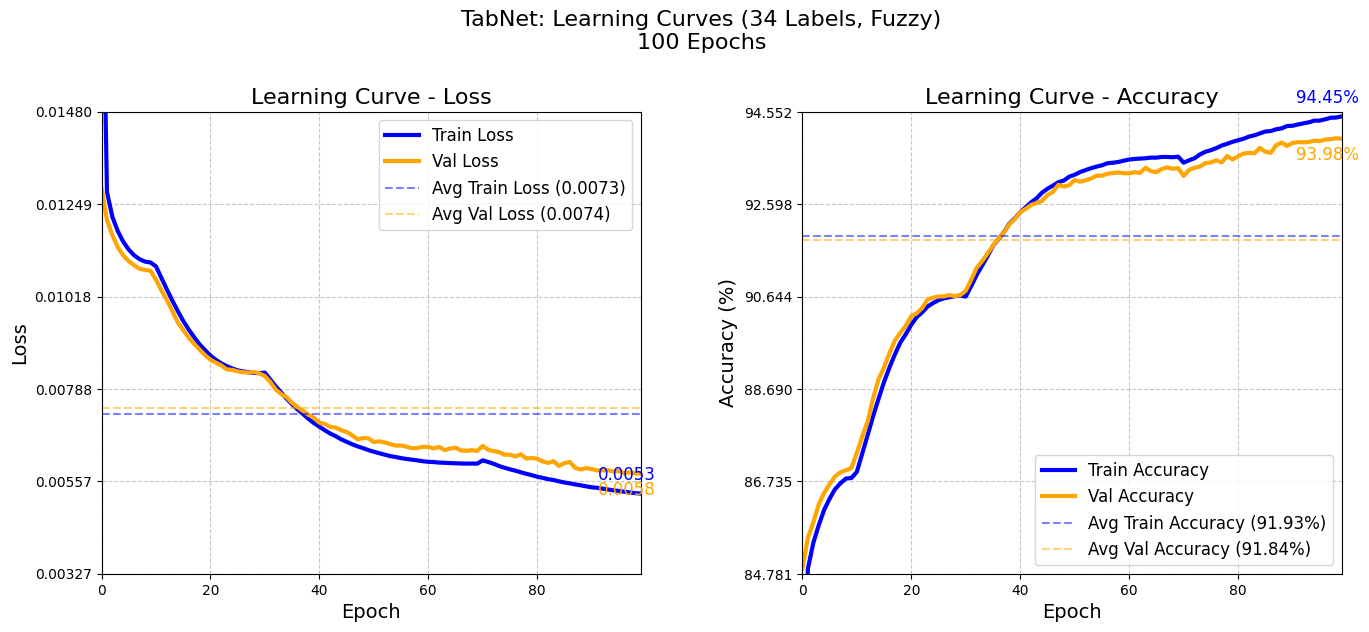

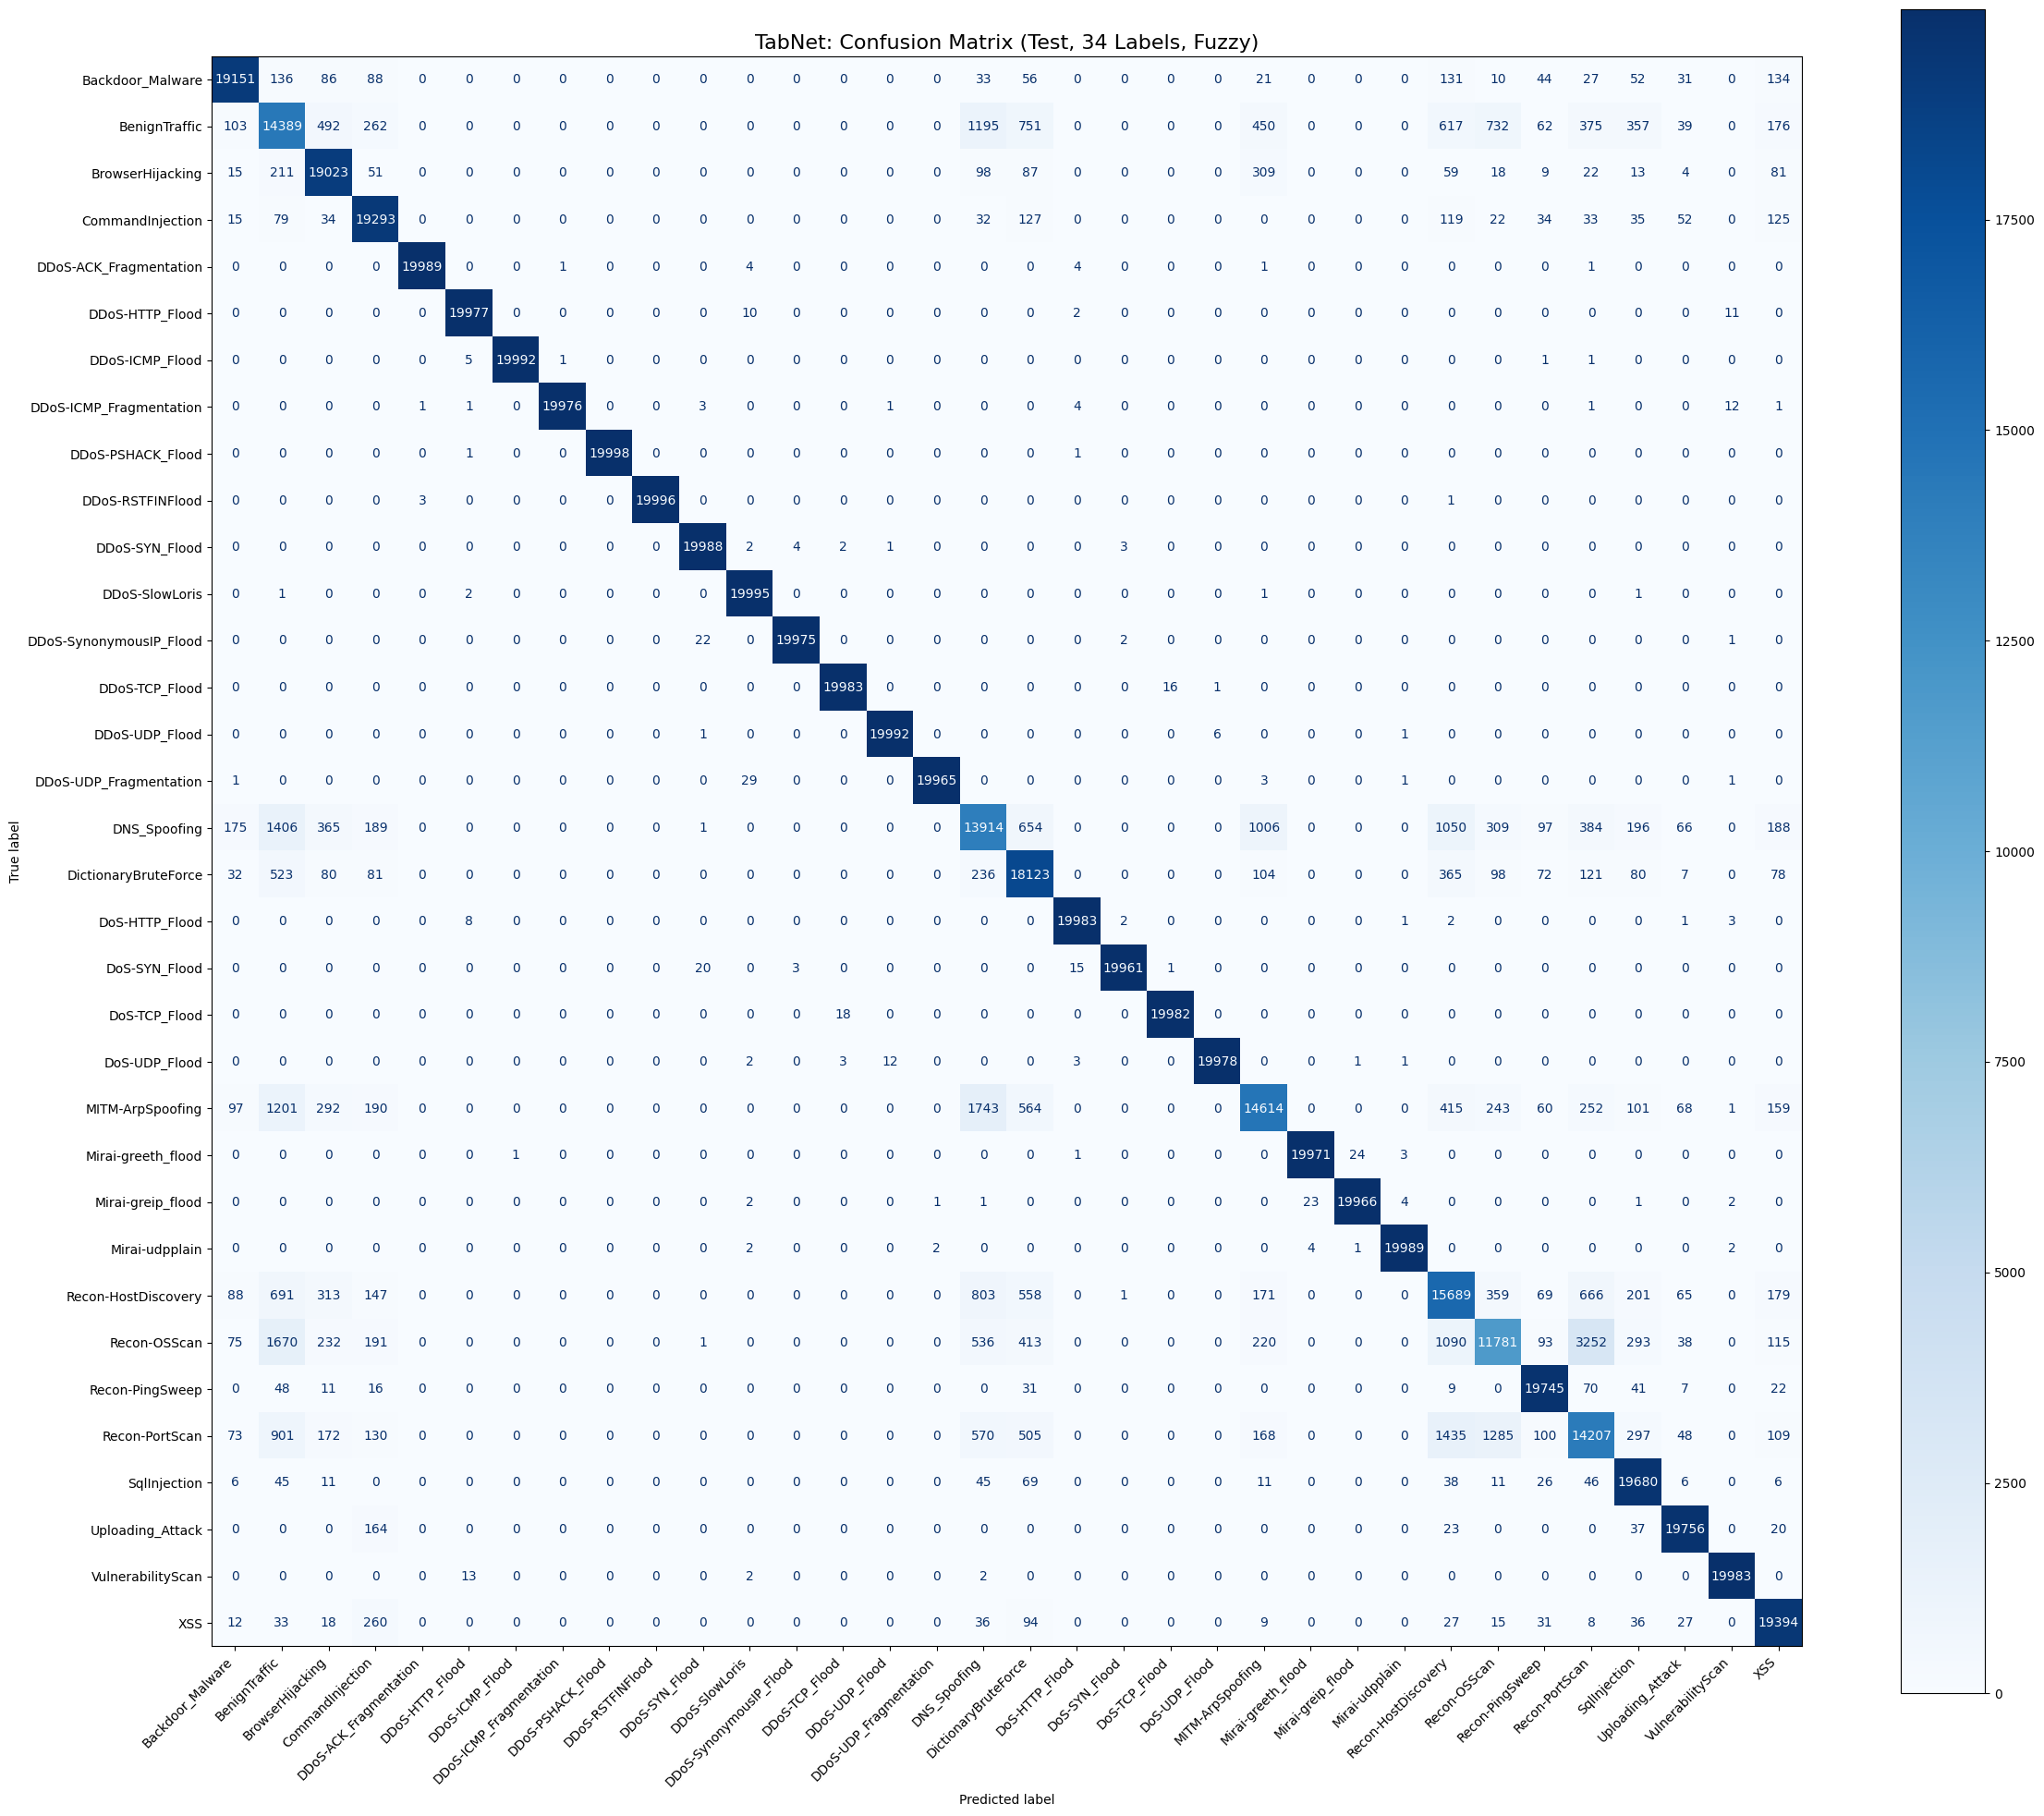

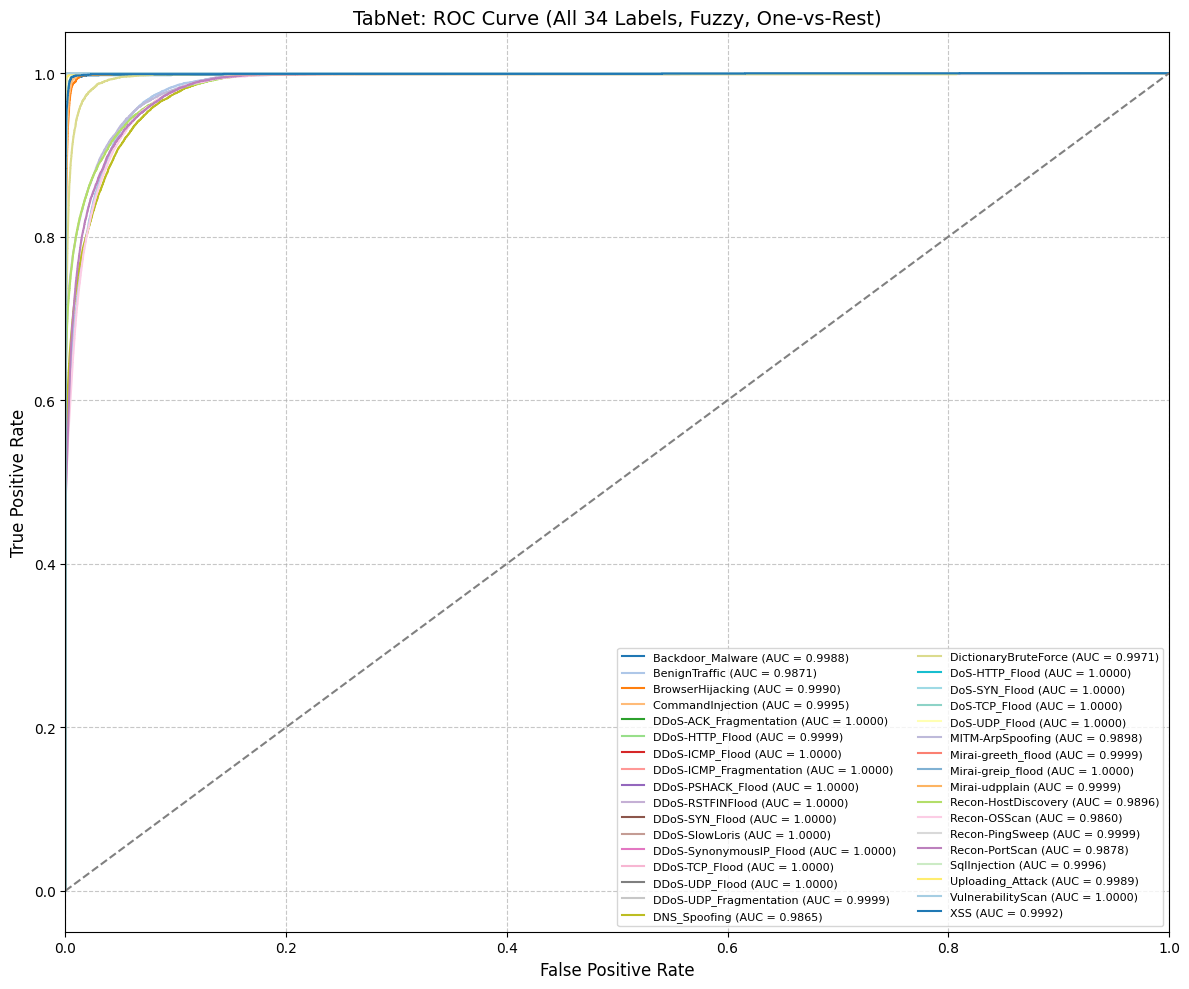

📈 Macro-average ROC-AUC Score (Multi-class, 34 Labels): 0.9976
Shape of test_features: (680000, 34)


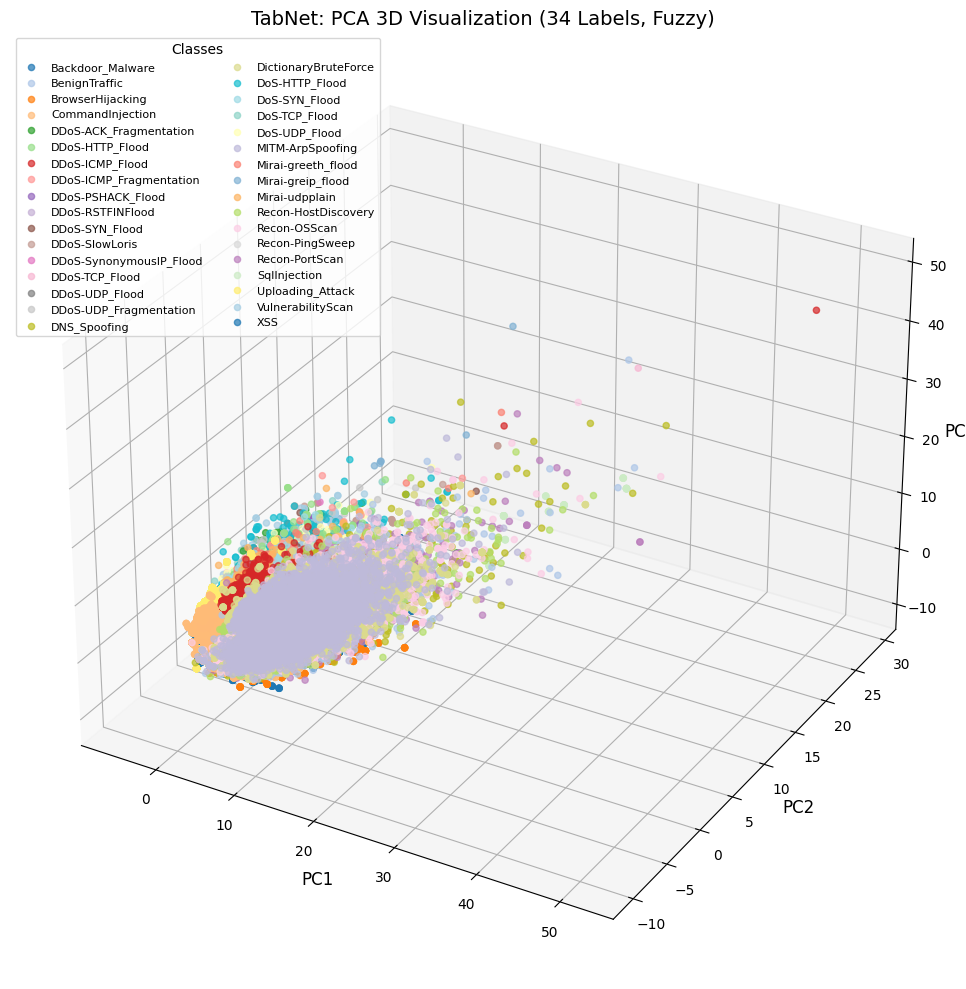

Shape of feature_importance: (340,)


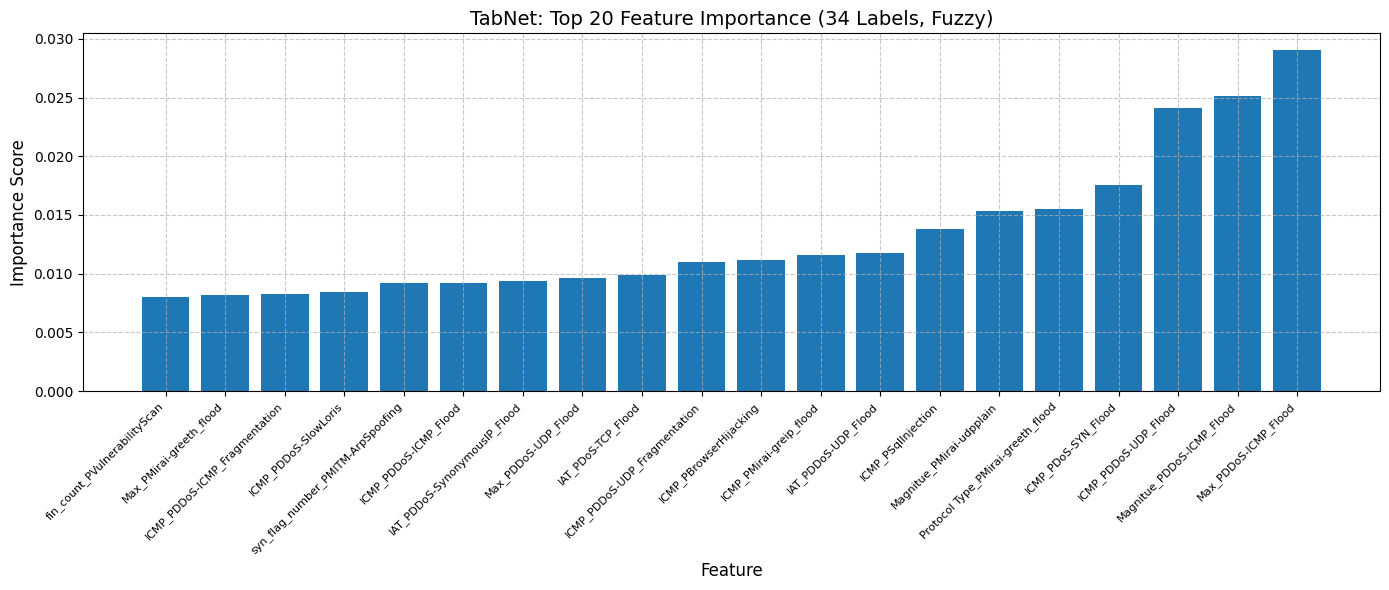

⏱️ Thời gian huấn luyện trung bình mỗi epoch: 48.23 giây

📊 Giá trị trung bình (100 epoch):
Train Loss trung bình: 0.0074
Val Loss trung bình: 0.0075
Train Accuracy trung bình: 91.80%
Val Accuracy trung bình: 91.77%


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"  # Thư mục chứa selected_features_top10_34labels.pkl

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_fuzzy_xgb_tabnet.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_fuzzy_xgb_tabnet.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_tabnet.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_tabnet.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_tabnet.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_fuzzy_xgb_tabnet.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_fuzzy_xgb_tabnet.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_fuzzy_xgb_tabnet.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_tabnet.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_tabnet.npy")
    print("✅ Đã tải tất cả dữ liệu cần thiết cho TabNet (34 nhãn, fuzzy)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 100  # 100 epoch
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'Backdoor_Malware', 1: 'BenignTraffic', 2: 'BrowserHijacking', 3: 'CommandInjection',
    4: 'DDoS-ACK_Fragmentation', 5: 'DDoS-HTTP_Flood', 6: 'DDoS-ICMP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-PSHACK_Flood', 9: 'DDoS-RSTFINFlood', 10: 'DDoS-SYN_Flood', 11: 'DDoS-SlowLoris',
    12: 'DDoS-SynonymousIP_Flood', 13: 'DDoS-TCP_Flood', 14: 'DDoS-UDP_Flood', 15: 'DDoS-UDP_Fragmentation',
    16: 'DNS_Spoofing', 17: 'DictionaryBruteForce', 18: 'DoS-HTTP_Flood', 19: 'DoS-SYN_Flood',
    20: 'DoS-TCP_Flood', 21: 'DoS-UDP_Flood', 22: 'MITM-ArpSpoofing', 23: 'Mirai-greeth_flood',
    24: 'Mirai-greip_flood', 25: 'Mirai-udpplain', 26: 'Recon-HostDiscovery', 27: 'Recon-OSScan',
    28: 'Recon-PingSweep', 29: 'Recon-PortScan', 30: 'SqlInjection', 31: 'Uploading_Attack',
    32: 'VulnerabilityScan', 33: 'XSS'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Lấy 20 màu từ tab20
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))  # Lấy 12 màu từ Set3
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))  # Lấy 12 màu từ Paired
# Kết hợp các bảng màu và đảm bảo đủ 34 màu khác nhau
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))  # Tổng cộng 34 màu
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(len(train_losses))
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs  # Sử dụng trực tiếp 0-99

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 99)
ax1.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
loss_min = min(train_losses_plot[1:].min(), val_losses_plot[1:].min())
loss_max = max(train_losses_plot[1:].max(), val_losses_plot[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_loss = np.mean(train_losses_plot[1:])
avg_val_loss = np.mean(val_losses_plot[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", (99, train_losses_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", (99, val_losses_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 99)
ax2.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
acc_min = min(train_accuracies_plot[1:].min(), val_accuracies_plot[1:].min())
acc_max = max(train_accuracies_plot[1:].max(), val_accuracies_plot[1:].max())
ax2.set_ylim(acc_min - 0.1, acc_max + 0.1)
ax2.set_yticks(np.linspace(acc_min - 0.1, acc_max + 0.1, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_accuracy = np.mean(train_accuracies_plot[1:])
avg_val_accuracy = np.mean(val_accuracies_plot[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", (99, train_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", (99, val_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

# Thêm tiêu đề chính
plt.suptitle("TabNet: Learning Curves (34 Labels, Fuzzy)\n100 Epochs", 
             fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{results_dir}/learning_curves_tabnet_34labels_fuzzy_xgb.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))  # Tăng kích thước lớn hơn để các ô rõ ràng
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
# Điều chỉnh kích thước font để dễ đọc
for text in disp.text_.ravel():
    text.set_fontsize(10)  # Tăng kích thước font của số liệu trong ô
plt.title("TabNet: Confusion Matrix (Test, 34 Labels, Fuzzy)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_tabnet_34labels_fuzzy_xgb.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, one-vs-rest, vẽ đủ 34 nhãn)
plt.figure(figsize=(12, 10))
for i in range(34):  # Vẽ cho tất cả 34 nhãn
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("TabNet: ROC Curve (All 34 Labels, Fuzzy, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)  # Chia legend thành 2 cột để dễ đọc
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_tabnet_34labels_fuzzy_xgb_all.png", bbox_inches="tight")
plt.show()

# Tính macro-average ROC-AUC cho tất cả nhãn
macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 Macro-average ROC-AUC Score (Multi-class, 34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

# Kiểm tra số mẫu
if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    # Apply PCA với n_components=3
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        
        # 3D Plot
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):  # Vẽ cho tất cả 34 nhãn
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("TabNet: PCA 3D Visualization (34 Labels, Fuzzy)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)  # Chia legend thành 2 cột
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_tabnet_34labels_fuzzy_xgb.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
# Giả định feature_importance có shape (batch_size, input_dim), lấy trung bình theo batch
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

# Tạo nhãn cho các đặc trưng (input_dim=340, từ 10 đặc trưng * 34 nhãn)
input_dim = 340  # Từ code huấn luyện/test
# Giả định 10 đặc trưng được chọn (cần danh sách cụ thể từ file xử lý dữ liệu)
try:
    selected_features = np.load(f"{output_dir}/selected_features_top10_34labels.pkl", allow_pickle=True)
except Exception as e:
    print(f"❌ Lỗi khi tải selected_features_top10_34labels.pkl: {str(e)}")
    # Sử dụng danh sách giả định nếu file không tồn tại
    selected_features = ['IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 'Protocol Type', 'rst_count']

feature_labels = []
for i in range(input_dim):
    feature_idx = i // 34  # Đặc trưng thứ mấy trong 10 đặc trưng
    label_idx = i % 34     # Nhãn thứ mấy trong 34 nhãn
    feature_labels.append(f"{selected_features[feature_idx]}_P{label_map[label_idx]}")

# Vẽ biểu đồ Feature Importance (chỉ hiển thị top 20 để tránh rối)
top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("TabNet: Top 20 Feature Importance (34 Labels, Fuzzy)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_tabnet_34labels_fuzzy_xgb.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print("\n📊 Giá trị trung bình (100 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **NODE-GAM**

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.cuda.amp import GradScaler, autocast
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# FeatureSelector
class FeatureSelector(nn.Module):
    def __init__(self, input_dim):
        super(FeatureSelector, self).__init__()
        self.importance_weights = nn.Parameter(torch.ones(input_dim) * 0.1)
        
    def forward(self, x):
        importance = torch.sigmoid(self.importance_weights)
        importance = importance / (importance.sum() + 1e-6)
        mask = importance.unsqueeze(0)
        return x * mask

# ObliviousDecisionTree
class ObliviousDecisionTree(nn.Module):
    def __init__(self, embed_dim, depth, input_dim):
        super(ObliviousDecisionTree, self).__init__()
        self.depth = depth
        self.num_leaves = 2 ** depth
        self.input_dim = input_dim
        
        self.thresholds = nn.Parameter(torch.randn(depth, input_dim) * 0.1)
        self.feature_weights = nn.Parameter(torch.randn(depth, input_dim) * 0.1)
        self.attention = nn.Parameter(torch.randn(input_dim) * 0.1)
        self.leaf_projection = nn.Linear(embed_dim, self.num_leaves)
        
        nn.init.xavier_normal_(self.thresholds, gain=0.1)
        nn.init.xavier_normal_(self.feature_weights, gain=0.1)
        nn.init.xavier_normal_(self.leaf_projection.weight, gain=0.1)
        nn.init.zeros_(self.leaf_projection.bias)
        nn.init.normal_(self.attention, mean=0.0, std=0.1)

    def forward(self, x, input_features):
        batch_size = x.size(0)
        
        attention_weights = torch.sigmoid(self.attention)
        attention_weights = attention_weights / (attention_weights.sum() + 1e-6)
        selected_features = input_features * attention_weights.unsqueeze(0)
        
        scores = torch.matmul(selected_features, self.feature_weights.t())
        scores = scores + self.thresholds.sum(dim=-1).unsqueeze(0)
        decisions = torch.sigmoid(scores)
        
        leaf_indices = torch.zeros(batch_size, device=x.device, dtype=torch.long)
        for d in range(self.depth):
            leaf_indices = leaf_indices * 2 + (decisions[:, d] > 0.5).long()
        
        leaf_probs = torch.zeros(batch_size, self.num_leaves, device=x.device)
        leaf_probs.scatter_(1, leaf_indices.unsqueeze(-1), 1.0)
        
        out = self.leaf_projection(x)
        out = F.softmax(out, dim=-1) * leaf_probs
        return out

# NODEGAM
class NODEGAM(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=192, num_trees=10, depth=6, num_layers=2, dropout=0.1):
        super(NODEGAM, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.num_trees = num_trees
        self.depth = depth
        self.num_layers = num_layers
        self.dropout = dropout

        self.bn = nn.BatchNorm1d(input_dim)
        self.feature_selector = FeatureSelector(input_dim)
        self.feature_dim = 16
        self.feature_nets = nn.ModuleList([
            nn.Sequential(
                nn.Linear(1, self.feature_dim),
                nn.ReLU(),
                nn.Dropout(dropout),
                nn.Linear(self.feature_dim, self.feature_dim),
                nn.ReLU(),
                nn.Dropout(dropout)
            ) for _ in range(input_dim)
        ])

        self.concat_dim = self.feature_dim * input_dim
        self.feature_projection = nn.Linear(self.concat_dim, embed_dim)
        self.tree_layers = nn.ModuleList([
            nn.ModuleList([
                ObliviousDecisionTree(embed_dim, depth, input_dim)
                for _ in range(num_trees)
            ]) for _ in range(num_layers)
        ])
        self.tree_projections = nn.ModuleList([
            nn.Linear(2**depth, embed_dim) for _ in range(num_layers)
        ])
        self.tree_weights = nn.ParameterList([
            nn.Parameter(torch.ones(num_trees) / num_trees) for _ in range(num_layers)
        ])
        self.layer_norms = nn.ModuleList([nn.LayerNorm(embed_dim) for _ in range(num_layers)])
        self.fc_output = nn.Linear(embed_dim, num_classes)
        self.importance_layer = nn.Linear(embed_dim, input_dim)

        for net in self.feature_nets:
            for layer in net:
                if isinstance(layer, nn.Linear):
                    nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
                    if layer.bias is not None:
                        nn.init.zeros_(layer.bias)
        nn.init.kaiming_normal_(self.feature_projection.weight, nonlinearity='relu')
        nn.init.zeros_(self.feature_projection.bias)
        for proj in self.tree_projections:
            nn.init.kaiming_normal_(proj.weight, nonlinearity='relu')
            nn.init.zeros_(proj.bias)
        nn.init.kaiming_normal_(self.fc_output.weight, nonlinearity='relu')
        nn.init.zeros_(self.fc_output.bias)
        nn.init.kaiming_normal_(self.importance_layer.weight, nonlinearity='relu')
        nn.init.zeros_(self.importance_layer.bias)

    def forward(self, x):
        input_features = torch.clamp(self.bn(x), -50, 50)
        input_features = self.feature_selector(input_features)
        feature_outputs = []
        for i in range(self.input_dim):
            feat = input_features[:, i:i+1]
            feat_out = self.feature_nets[i](feat)
            if torch.isnan(feat_out).any():
                tqdm.write(f"NaN detected in feature_nets[{i}]")
            feature_outputs.append(feat_out)
        x = torch.cat(feature_outputs, dim=1)
        x = self.feature_projection(x)
        if torch.isnan(x).any():
            tqdm.write("NaN detected in feature_projection")

        for layer_idx in range(self.num_layers):
            tree_outputs = []
            for tree in self.tree_layers[layer_idx]:
                tree_out = tree(x, input_features)
                tree_outputs.append(tree_out)
            tree_weights = F.softmax(self.tree_weights[layer_idx], dim=0)
            tree_out = torch.stack(tree_outputs, dim=1)
            tree_out = torch.einsum('bnt,n->bt', tree_out, tree_weights)
            tree_out = self.tree_projections[layer_idx](tree_out)
            x = self.layer_norms[layer_idx](x + tree_out)
            if torch.isnan(x).any():
                tqdm.write(f"NaN detected in tree_layer[{layer_idx}]")

        output = self.fc_output(x)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        if torch.isnan(output).any() or torch.isnan(sparsity_loss).any():
            tqdm.write("NaN detected in output or sparsity_loss")

        return output, sparsity_loss, masks

# Tạo thư mục
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu fuzzy từ XGBoost (34 nhãn)
try:
    X_train_fuzzy = np.load(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_fuzzy = np.load(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_fuzzy = np.load(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write("✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn, 340 đặc trưng)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} chứa giá trị NaN hoặc Inf")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Chuẩn hóa dữ liệu
try:
    X_train_fuzzy = (X_train_fuzzy - X_train_fuzzy.mean(axis=0)) / (X_train_fuzzy.std(axis=0) + 1e-6)
    X_val_fuzzy = (X_val_fuzzy - X_val_fuzzy.mean(axis=0)) / (X_val_fuzzy.std(axis=0) + 1e-6)
    X_test_fuzzy = (X_test_fuzzy - X_test_fuzzy.mean(axis=0)) / (X_test_fuzzy.std(axis=0) + 1e-6)
except Exception as e:
    tqdm.write(f"❌ Lỗi khi chuẩn hóa dữ liệu: {str(e)}")
    raise

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_fuzzy)) or np.any(np.isinf(X_train_fuzzy)):
    tqdm.write("⚠️ X_train_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_fuzzy)) or np.any(np.isinf(X_val_fuzzy)):
    tqdm.write("⚠️ X_val_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_fuzzy)) or np.any(np.isinf(X_test_fuzzy)):
    tqdm.write("⚠️ X_test_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_fuzzy, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_fuzzy, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_fuzzy, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long)

# DataLoader
batch_size = 4096
accumulation_steps = 8
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Giải phóng bộ nhớ GPU
torch.cuda.empty_cache()

# Khởi tạo mô hình
input_dim = X_train_fuzzy.shape[1]  # 340 (10 đặc trưng × 34 nhãn)
model = NODEGAM(input_dim=input_dim, num_classes=34, embed_dim=192, num_trees=10, depth=6, num_layers=2, dropout=0.1).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler()

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 100
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_names = [
    'Backdoor_Malware', 'BenignTraffic', 'BrowserHijacking', 'CommandInjection',
    'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-ICMP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-PSHACK_Flood', 'DDoS-RSTFINFlood', 'DDoS-SYN_Flood', 'DDoS-SlowLoris',
    'DDoS-SynonymousIP_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood', 'DDoS-UDP_Fragmentation',
    'DNS_Spoofing', 'DictionaryBruteForce', 'DoS-HTTP_Flood', 'DoS-SYN_Flood',
    'DoS-TCP_Flood', 'DoS-UDP_Flood', 'MITM-ArpSpoofing', 'Mirai-greeth_flood',
    'Mirai-greip_flood', 'Mirai-udpplain', 'Recon-HostDiscovery', 'Recon-OSScan',
    'Recon-PingSweep', 'Recon-PortScan', 'SqlInjection', 'Uploading_Attack',
    'VulnerabilityScan', 'XSS'
]

# Huấn luyện
tqdm.write("Huấn luyện NODE-GAM với Focal + Sparsity Loss (34 Nhãn, 340 Đặc trưng)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Batch Huấn luyện (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for batch_idx, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
            optimizer.zero_grad(set_to_none=True)
            
            with autocast():
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
                loss = total_loss / accumulation_steps
            
            if torch.isnan(loss) or torch.isinf(loss):
                tqdm.write(f"Phát hiện NaN hoặc Inf trong total_loss tại batch {batch_idx+1}")
                continue
            
            scaler.scale(loss).backward()
            
            # Tính gradient norm cho logging
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5, error_if_nonfinite=False)
            
            if (batch_idx + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                scaler.step(optimizer)
                scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if batch_idx < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {batch_idx+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")
            
            # Giải phóng bộ nhớ
            del X_batch, Y_batch, outputs, sparsity_loss, masks, total_loss, focal_loss, loss
            torch.cuda.empty_cache()

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Đánh giá
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Đánh giá (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
                with autocast():
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})
                
                # Giải phóng bộ nhớ
                del X_batch, Y_batch, outputs, sparsity_loss, focal_loss, loss
                torch.cuda.empty_cache()

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)  # Cập nhật cho 34 nhãn
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Đánh giá): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Các cặp nhầm lẫn hàng đầu: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình sau mỗi epoch (đồng bộ với TabR và FT-Transformer)
    torch.save(model.state_dict(), f"{results_dir}/nodegam_34labels_fuzzy_xgb_epoch_{epoch+1}.pth")
    tqdm.write(f"📦 Lưu mô hình tại epoch {epoch+1}")

    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/nodegam_34labels_fuzzy_xgb_best.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất (F1: {best_f1:.4f}) tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/nodegam_34labels_fuzzy_xgb_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/nodegam_34labels_fuzzy_xgb_final.pth")

# Kiểm tra trên tập test
model.load_state_dict(torch.load(f"{results_dir}/nodegam_34labels_fuzzy_xgb_best.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
            with autocast():
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(X_batch.cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})
            
            # Giải phóng bộ nhớ
            del X_batch, Y_batch, outputs, sparsity_loss, masks, probs
            torch.cuda.empty_cache()

test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

pred_counts = np.bincount(test_preds, minlength=34)  # Cập nhật cho 34 nhãn
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Các cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

# Lưu dữ liệu đánh giá (đồng bộ với TabR và FT-Transformer)
np.save(f"{results_dir}/train_losses_34labels_fuzzy_xgb_nodegam.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_nodegam.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_fuzzy_xgb_nodegam.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_nodegam.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_fuzzy_xgb_nodegam.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_fuzzy_xgb_nodegam.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_fuzzy_xgb_nodegam.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_nodegam.npy", np.array(epoch_times))
np.save(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_nodegam.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_fuzzy_xgb_nodegam.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_fuzzy_xgb_nodegam.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_fuzzy_xgb_nodegam.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_nodegam.npy", avg_mask)

avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)

# Lưu kết quả vào file văn bản
with open(f"{results_dir}/NODE-GAM_34labels_fuzzy_xgb.txt", 'w') as f:
    f.write("Kết quả huấn luyện NODE-GAM (34 nhãn)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/NODE-GAM_34labels_fuzzy_xgb.txt")

# In shape của các dữ liệu đã lưu
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Ma trận nhầm lẫn shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Tầm quan trọng đặc trưng shape: {avg_mask.shape}")

✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn, 340 đặc trưng)
Alpha: tensor([0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294,
        0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294,
        0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294,
        0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294],
       device='cuda:0')


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Huấn luyện NODE-GAM với Focal + Sparsity Loss (34 Nhãn, 340 Đặc trưng)


Batch Huấn luyện (Epoch 1/100):   0%|          | 1/539 [00:01<15:28,  1.72s/batch, loss=0.1241]

Batch 1: Outputs max/min: 2.9004/-2.3535, Focal Loss: 0.1235, Sparsity Loss: 0.5536, Grad Norm: 14024.5391, Mask sum: 167.5000


Batch Huấn luyện (Epoch 1/100):   0%|          | 2/539 [00:02<08:09,  1.10batch/s, loss=0.1227]

Batch 2: Outputs max/min: 2.9004/-2.3574, Focal Loss: 0.1222, Sparsity Loss: 0.5536, Grad Norm: 13893.6553, Mask sum: 167.5000


Batch Huấn luyện (Epoch 1/100):   1%|          | 3/539 [00:02<05:27,  1.64batch/s, loss=0.1241]

Batch 3: Outputs max/min: 2.9043/-2.3613, Focal Loss: 0.1235, Sparsity Loss: 0.5536, Grad Norm: 13537.1631, Mask sum: 167.5000


Batch Huấn luyện (Epoch 1/100):   1%|          | 4/539 [00:02<04:02,  2.20batch/s, loss=0.1242]

Batch 4: Outputs max/min: 2.8926/-2.3652, Focal Loss: 0.1236, Sparsity Loss: 0.5536, Grad Norm: 14054.3447, Mask sum: 167.5000


Batch Huấn luyện (Epoch 1/100):   1%|          | 5/539 [00:03<04:28,  1.99batch/s, loss=0.1240]

Batch 5: Outputs max/min: 2.9082/-2.3672, Focal Loss: 0.1234, Sparsity Loss: 0.5536, Grad Norm: 14017.0137, Mask sum: 167.5000


✅ Epoch 1/100: Train Loss: 0.0873, Val Loss: 0.0517, Train Acc: 15.89%, Val Acc: 37.84%, F1: 0.3163, Precision: 0.5825, Recall: 0.3784, Time: 145.29s
Phân bố dự đoán (Đánh giá): [   662      0    355 142111     17   7469  18746  10883  14058  16599
  41470   9515    160  31313      4  22772    566     70   6408   7999
     39  55763    933    183  27058      0   8260      0    502  47097
   7005      0  31983      0]
Ma trận nhầm lẫn:
[[  660     0     0 ...     0     8     0]
 [    0     0     0 ...     0     0     0]
 [    0     0   355 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0 13508     0]
 [    0     0     0 ...     0     0     0]]
Các cặp nhầm lẫn hàng đầu: [('DDoS-SYN_Flood', 'DDoS-SynonymousIP_Flood', 14780), ('DDoS-UDP_Flood', 'DoS-UDP_Flood', 14703), ('DoS-UDP_Flood', 'Mirai-udpplain', 14670), ('DDoS-TCP_Flood', 'DoS-TCP_Flood', 14505), ('Mirai-greeth_flood', 'Mirai-greip_flood', 13643)]
📦 Lưu mô hình tại epoch 1
📦 Lưu

KeyboardInterrupt: 

# **CODE TẢI KẾT QUẢ**

In [7]:
import os
import zipfile
from IPython.display import FileLink

# Đường dẫn đến các thư mục
processed_data_dir = "/kaggle/working/processed_data"
results_dir = "/kaggle/working/results"

# Tạo file ZIP cho thư mục processed_data
# processed_zip = "/kaggle/working/processed_data.zip"
# with zipfile.ZipFile(processed_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     for root, dirs, files in os.walk(processed_data_dir):
#         for file in files:
#             file_path = os.path.join(root, file)
#             # Thêm file vào ZIP với đường dẫn tương đối
#             zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Tạo file ZIP cho thư mục results
results_zip = "/kaggle/working/results.zip"
with zipfile.ZipFile(results_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(results_dir):
        for file in files:
            file_path = os.path.join(root, file)
            # Thêm file vào ZIP với đường dẫn tương đối
            zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Hiển thị liên kết tải xuống
# print("Tải xuống processed_data.zip:")
# display(FileLink("processed_data.zip"))

print("Tải xuống results.zip:")
display(FileLink("results.zip"))

Tải xuống results.zip:


/kaggle/working/results.zip